# Project - Solar Panel Failure Prediction Model

**Problem Statement**: A solar panel failure prediction problem is a supervised machine learning problem that aims to predict the likelihood of a solar panel failure based on historical data. Such a model aims to identify potential issues before they occur, allowing for preventative maintenance and reducing the likelihood of unexpected downtime

CRISP-DM (Cross-Industry Standard Process for Data Mining) is a popular methodology for data science projects.

CRISP-ML is an extension of CRISP-DM that is specifically tailored to machine learning projects.

The acronym stands for CRoss-Industry Standard Process for Machine Learning.

CRISP-ML(Q) process model describes six phases:

1. Business and Data Understanding
2. Data Preparation (Data Engineering)
3. Model Building (Machine Learning)
4. Model Evaluation and Tunning
5. Deployment
6. Monitoring and Maintenance


**Objective(s)**: Maximize the usage and efficiency of Solar panels

**Constraints**: Minimize costs and improve performance

**Success Criteria**

**Business Success Criteria**: Accurately predict solar panel failures in advance to minimize downtime and maintenance costs

**ML Success Criteria**: High prediction accuracy (e.g. F1-score, precision, recall)

**Economic Success Criteria**: Minimizing the cost of the solar panel system

**Load the Data and perform EDA and Data Preprocessing**

**Importing necessary libraries**

In [1]:
## Importing Libraries

import mysql.connector as sql

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine.outliers import Winsorizer


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import joblib
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
solar = sql.connect( host = "localhost",
                  user = "root",
                  password = "Mahesh@1603", 
                  database = "sample2")

sql_query = "SELECT * FROM sample2.solar"

data = pd.read_sql(sql_query, solar)

print(data)

            Time       Ipv         Vpv         Vdc        ia        ib  \
0       2.769752  1.411499  101.220703  142.968750  0.072997 -0.490112   
1       9.651248  1.560974  101.153565  141.796875  0.321410 -0.490112   
2       7.199194  1.178772  101.037598  143.554688 -0.020997  0.422974   
3       6.661748  1.482452  101.519775  142.089844 -0.343263  0.469971   
4      10.137799  1.474884  100.756836  142.675781  0.173705  0.268555   
...          ...       ...         ...         ...       ...       ...   
24995   1.709892  1.836273   74.981689  145.312500 -0.242555 -0.261841   
24996   6.038727  1.809784   74.682617  142.675781  0.354979  0.073853   
24997   3.756037  1.795593   87.762451  144.140625  0.482543 -0.255127   
24998   8.256311  1.607330  101.306152  142.675781  0.435546 -0.261841   
24999   4.456433  1.416229  101.928711  144.140625 -0.457398  0.496826   

             ic          va          vb          vc      Iabc         If  \
0      0.336543  -26.748810  148.87

In [3]:
data.columns

Index(['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf', 'Label'],
      dtype='object')

In [4]:
data["Label"]

0        Not Faulty
1        Not Faulty
2        Not Faulty
3        Not Faulty
4        Not Faulty
            ...    
24995        Faulty
24996        Faulty
24997        Faulty
24998        Faulty
24999        Faulty
Name: Label, Length: 25000, dtype: object

In [5]:
data.head(5)

Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0   2.769752  1.411499  101.220703  142.968750  0.072997 -0.490112  0.336543   
1   9.651248  1.560974  101.153565  141.796875  0.321410 -0.490112  0.135127   
2   7.199194  1.178772  101.037598  143.554688 -0.020997  0.422974 -0.408696   
3   6.661748  1.482452  101.519775  142.089844 -0.343263  0.469971 -0.126714   
4  10.137799  1.474884  100.756836  142.675781  0.173705  0.268555 -0.502690   

           va          vb          vc      Iabc         If        Vabc  \
0  -26.748810  148.872376 -116.136526  0.494040  49.777418  155.448206   
1  -95.242157  153.899078  -59.404297  0.466000  50.071965  154.800179   
2    3.363190 -135.154419  132.972565  0.525218  50.042150  155.051278   
3  113.444367 -148.884430   37.348684  0.467607  50.198979  155.171126   
4  -61.055756  -87.177734  156.197459  0.491109  50.045572  155.571822   

          Vf       Label  
0  50.006573  Not Faulty  
1  50.004718  Not Faulty  
2  50.004369  Not Faulty  
3  50.003021  Not Faulty  
4  50.003059  Not Faulty

In [6]:
data.tail(5)

Time       Ipv         Vpv         Vdc        ia        ib  \
24995  1.709892  1.836273   74.981689  145.312500 -0.242555 -0.261841   
24996  6.038727  1.809784   74.682617  142.675781  0.354979  0.073853   
24997  3.756037  1.795593   87.762451  144.140625  0.482543 -0.255127   
24998  8.256311  1.607330  101.306152  142.675781  0.435546 -0.261841   
24999  4.456433  1.416229  101.928711  144.140625 -0.457398  0.496826   

             ic          va          vb          vc      Iabc         If  \
24995  0.470820   76.184082   81.705017 -152.673543  0.482437  50.023322   
24996 -0.408696 -118.905029  -21.119385  146.758830  0.455725  50.084425   
24997 -0.207280 -154.212494   85.827637   67.613373  0.516475  50.077651   
24998 -0.173711 -150.620270  108.923950   41.873118  0.451219  49.931206   
24999 -0.039434  137.818451 -131.043854   -5.279846  0.469121  50.000826   

             Vabc         Vf   Label  
24995  155.236707  49.998656  Faulty  
24996  155.201368  49.999723  Faulty  
24997  154.961512  50.007515  Faulty  
24998  155.302769  49.998610  Faulty  
24999  154.977210  50.010022  Faulty

In [7]:
data.describe()

Time           Ipv           Vpv           Vdc            ia  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       6.744446      1.882271     90.333715    140.944676     -0.018945   
std        4.080694      0.407151     17.908641     26.626133      0.615108   
min        0.000338      0.711426      1.837158      1.171875     -6.332032   
25%        3.159838      1.488129     87.725830    143.261719     -0.403687   
50%        6.579623      1.824921     90.728760    144.140625     -0.007569   
75%       10.209485      2.262939    101.293945    147.070312      0.361693   
max       14.399164      3.060455    105.902100    250.195312      6.874145   

                 ib            ic            va            vb            vc  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       0.013329     -0.042671      1.799912      1.126413     -0.377780   
std        0.637692      0.612958    109.874977    109.976401    109.516660   
min       -6.264038     -8.055791   -158.106079   -157.792664   -159.849955   
25%       -0.349121     -0.368413   -107.646179   -108.926964   -108.735097   
50%        0.006714     -0.052861      2.392807      1.657486     -2.503306   
75%        0.375977      0.329829    111.265526    111.446343    108.909887   
max        6.438599      6.345454    161.204071    159.480286    158.969981   

               Iabc            If          Vabc            Vf  
count  25000.000000  25000.000000  25000.000000  25000.000000  
mean       0.601731     49.774648    154.962888     49.999313  
std        0.629853      3.009707      6.158195      0.022174  
min        0.000003     -0.018227      1.000000     49.475207  
25%        0.461667     49.921525    154.974481     49.996024  
50%        0.496449     50.007566    155.256836     50.000046  
75%        0.683416     50.101172    155.475724     50.003831  
max        6.514318     51.330074    156.253602     50.455271

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25000 non-null  float64
 1   Ipv     25000 non-null  float64
 2   Vpv     25000 non-null  float64
 3   Vdc     25000 non-null  float64
 4   ia      25000 non-null  float64
 5   ib      25000 non-null  float64
 6   ic      25000 non-null  float64
 7   va      25000 non-null  float64
 8   vb      25000 non-null  float64
 9   vc      25000 non-null  float64
 10  Iabc    25000 non-null  float64
 11  If      25000 non-null  float64
 12  Vabc    25000 non-null  float64
 13  Vf      25000 non-null  float64
 14  Label   25000 non-null  object 
dtypes: float64(14), object(1)
memory usage: 2.9+ MB


In [9]:
# Drop the first column - Time 
data = data.drop(columns = 'Time', axis = 1)
data

Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.411499  101.220703  142.968750  0.072997 -0.490112  0.336543   
1      1.560974  101.153565  141.796875  0.321410 -0.490112  0.135127   
2      1.178772  101.037598  143.554688 -0.020997  0.422974 -0.408696   
3      1.482452  101.519775  142.089844 -0.343263  0.469971 -0.126714   
4      1.474884  100.756836  142.675781  0.173705  0.268555 -0.502690   
...         ...         ...         ...       ...       ...       ...   
24995  1.836273   74.981689  145.312500 -0.242555 -0.261841  0.470820   
24996  1.809784   74.682617  142.675781  0.354979  0.073853 -0.408696   
24997  1.795593   87.762451  144.140625  0.482543 -0.255127 -0.207280   
24998  1.607330  101.306152  142.675781  0.435546 -0.261841 -0.173711   
24999  1.416229  101.928711  144.140625 -0.457398  0.496826 -0.039434   

               va          vb          vc      Iabc         If        Vabc  \
0      -26.748810  148.872376 -116.136526  0.494040  49.777418  155.448206   
1      -95.242157  153.899078  -59.404297  0.466000  50.071965  154.800179   
2        3.363190 -135.154419  132.972565  0.525218  50.042150  155.051278   
3      113.444367 -148.884430   37.348684  0.467607  50.198979  155.171126   
4      -61.055756  -87.177734  156.197459  0.491109  50.045572  155.571822   
...           ...         ...         ...       ...        ...         ...   
24995   76.184082   81.705017 -152.673543  0.482437  50.023322  155.236707   
24996 -118.905029  -21.119385  146.758830  0.455725  50.084425  155.201368   
24997 -154.212494   85.827637   67.613373  0.516475  50.077651  154.961512   
24998 -150.620270  108.923950   41.873118  0.451219  49.931206  155.302769   
24999  137.818451 -131.043854   -5.279846  0.469121  50.000826  154.977210   

              Vf       Label  
0      50.006573  Not Faulty  
1      50.004718  Not Faulty  
2      50.004369  Not Faulty  
3      50.003021  Not Faulty  
4      50.003059  Not Faulty  
...          ...         ...  
24995  49.998656      Faulty  
24996  49.999723      Faulty  
24997  50.007515      Faulty  
24998  49.998610      Faulty  
24999  50.010022      Faulty  

[25000 rows x 14 columns]

In [10]:
data.duplicated().sum()

0

In [11]:
data['Label'].value_counts()

Faulty        15000
Not Faulty    10000
Name: Label, dtype: int64

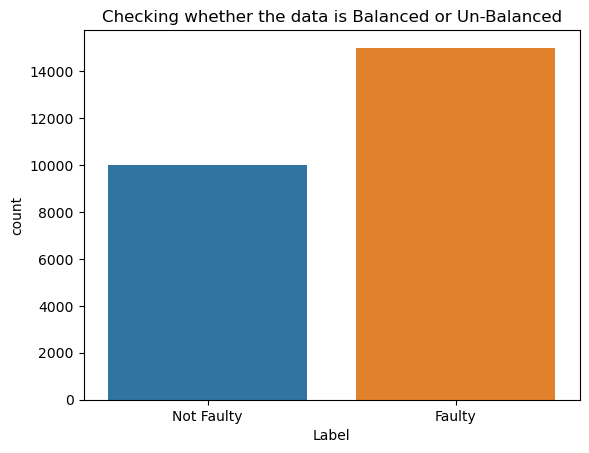

In [12]:
# Set the column to be plotted on the x-axis
x = 'Label'

# Create the count plot
sns.countplot(x = x, data = data)

# tile for the plot
plt.title('Checking whether the data is Balanced or Un-Balanced')

# Show the plot
plt.show()

# EDA

In [13]:
Mean = data.mean()
print(Mean)

Ipv       1.882271
Vpv      90.333715
Vdc     140.944676
ia       -0.018945
ib        0.013329
ic       -0.042671
va        1.799912
vb        1.126413
vc       -0.377780
Iabc      0.601731
If       49.774648
Vabc    154.962888
Vf       49.999313
dtype: float64


In [14]:
Median = data.median()
print(Median)

Ipv       1.824921
Vpv      90.728760
Vdc     144.140625
ia       -0.007569
ib        0.006714
ic       -0.052861
va        2.392807
vb        1.657486
vc       -2.503306
Iabc      0.496449
If       50.007566
Vabc    155.256836
Vf       50.000046
dtype: float64


In [15]:
Mode = data.mode()
print(Mode)

        Ipv         Vpv         Vdc        ia        ib        ic          va  \
0  1.492859  101.190185  143.554688  0.005858 -0.214844 -0.341558  153.983460   
1       NaN         NaN         NaN       NaN       NaN       NaN  155.116577   

           vb          vc  Iabc    If  Vabc    Vf   Label  
0 -154.345093  155.160777   1.0  50.0   1.0  50.0  Faulty  
1         NaN         NaN   NaN   NaN   NaN   NaN     NaN  


In [16]:
Variance = data.var()
print(Variance)

Ipv         0.165772
Vpv       320.719417
Vdc       708.950971
ia          0.378358
ib          0.406651
ic          0.375717
va      12072.510471
vb      12094.808711
vc      11993.898784
Iabc        0.396714
If          9.058335
Vabc       37.923367
Vf          0.000492
dtype: float64


In [17]:
Standard_deviation = data.std()
print(Standard_deviation)

Ipv       0.407151
Vpv      17.908641
Vdc      26.626133
ia        0.615108
ib        0.637692
ic        0.612958
va      109.874977
vb      109.976401
vc      109.516660
Iabc      0.629853
If        3.009707
Vabc      6.158195
Vf        0.022174
dtype: float64


In [18]:
Kurtosis = data.kurt()
print(Kurtosis)

Ipv      -1.452285
Vpv      15.241892
Vdc      22.123364
ia       39.904045
ib       42.167078
ic       42.033456
va       -1.501044
vb       -1.504712
vc       -1.492587
Iabc     70.992996
If      207.566260
Vabc    596.044430
Vf      158.369233
dtype: float64


In [19]:
Skewness = data.skew()
print(Skewness)

Ipv      0.195146
Vpv     -3.670907
Vdc     -4.278095
ia       0.171974
ib       0.278150
ic      -0.682984
va      -0.010146
vb      -0.001142
vc       0.019431
Iabc     8.272956
If     -14.075869
Vabc   -24.194001
Vf      -7.035519
dtype: float64


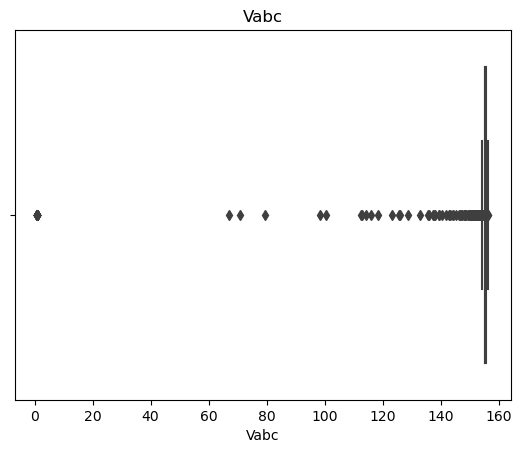

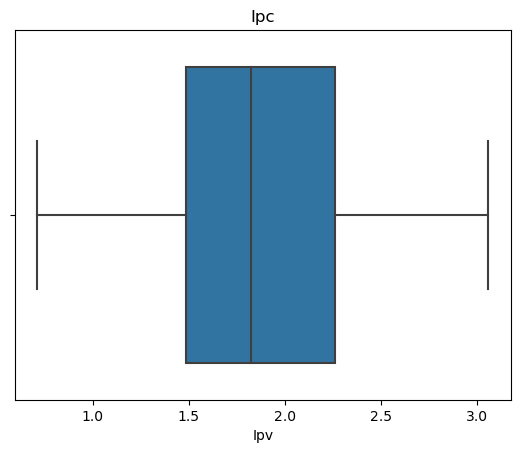

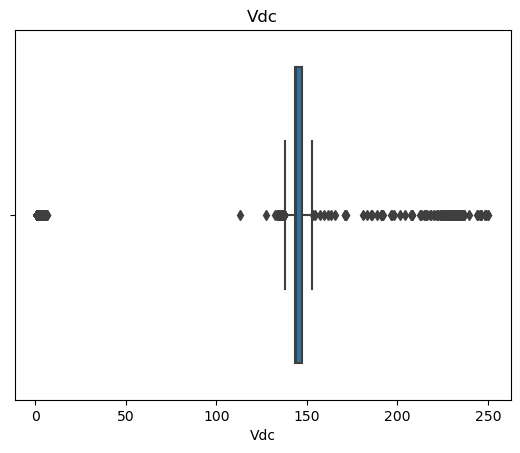

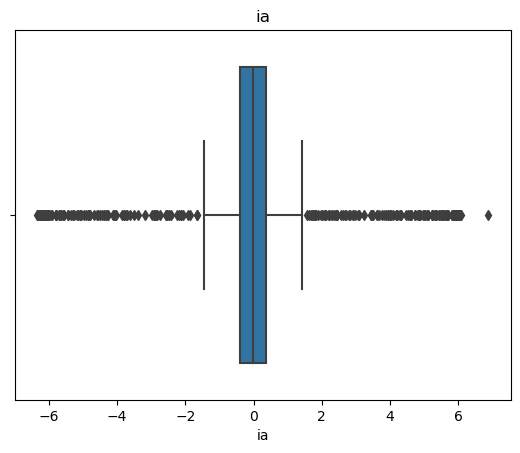

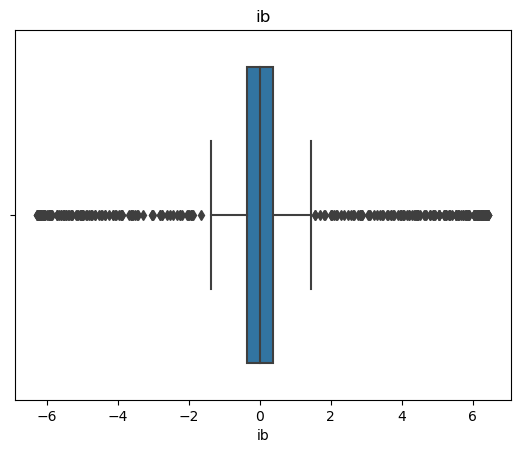

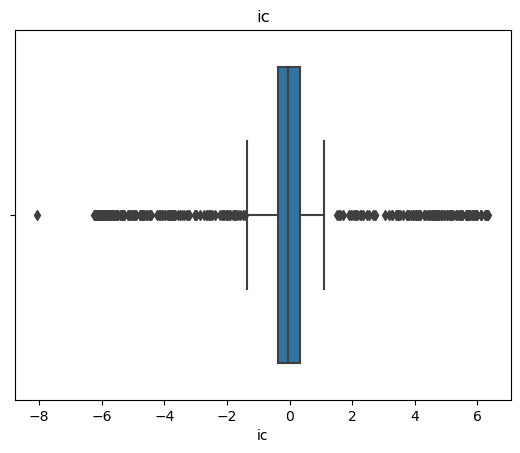

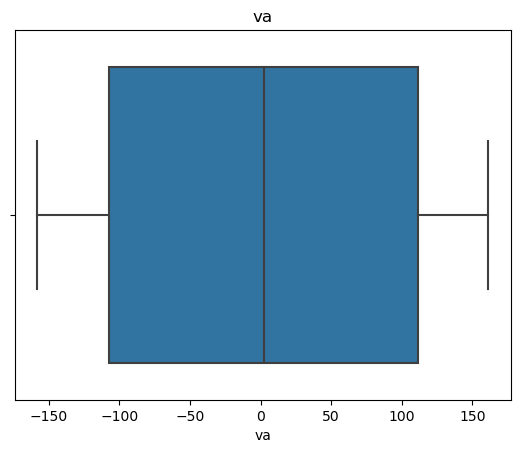

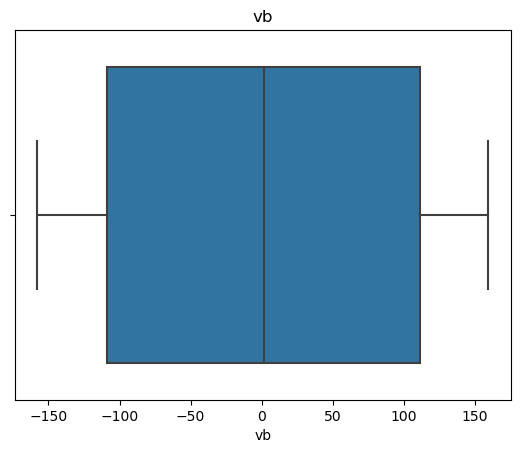

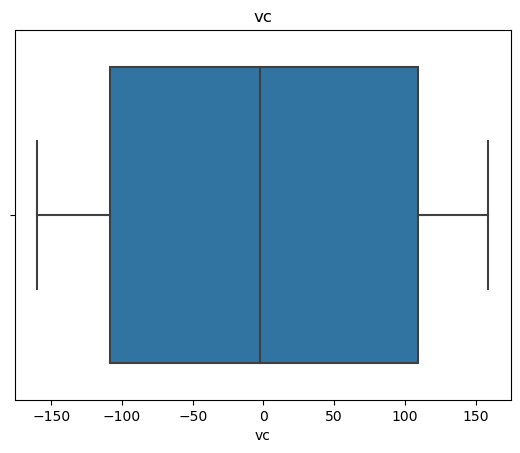

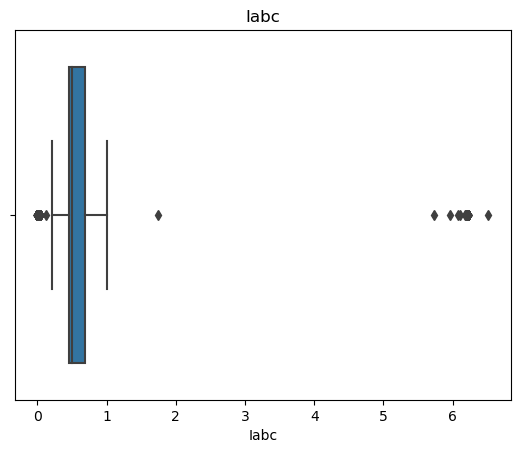

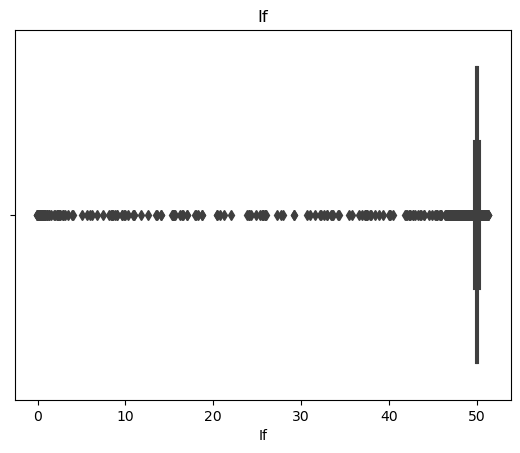

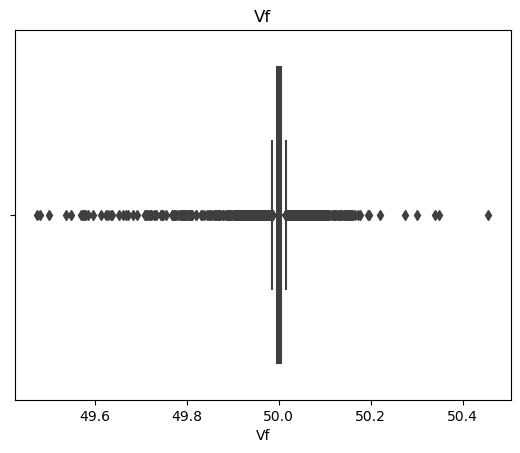

In [20]:
## Box plot for all the variables in the datset 

sns.boxplot(data.Vabc); plt.title('Vabc'); plt.show()
sns.boxplot(data.Ipv); plt.title('Ipc'); plt.show()
sns.boxplot(data.Vdc); plt.title('Vdc'); plt.show()
sns.boxplot(data.ia); plt.title('ia'); plt.show()
sns.boxplot(data.ib); plt.title('ib'); plt.show()
sns.boxplot(data.ic); plt.title('ic'); plt.show()
sns.boxplot(data.va); plt.title('va'); plt.show()
sns.boxplot(data.vb); plt.title('vb'); plt.show()
sns.boxplot(data.vc); plt.title('vc'); plt.show()
sns.boxplot(data.Iabc); plt.title('Iabc'); plt.show()
sns.boxplot(data.If); plt.title('If'); plt.show()
sns.boxplot(data.Vf); plt.title('Vf'); plt.show()

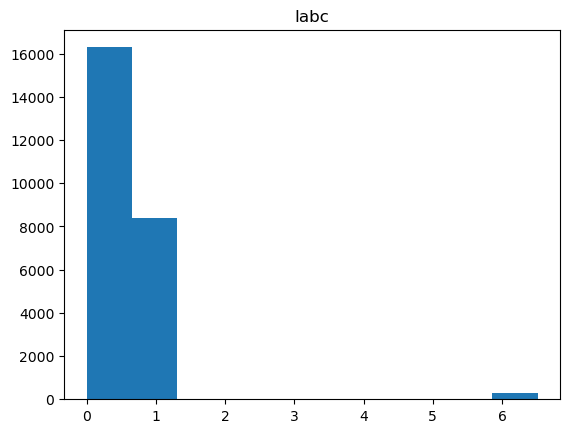

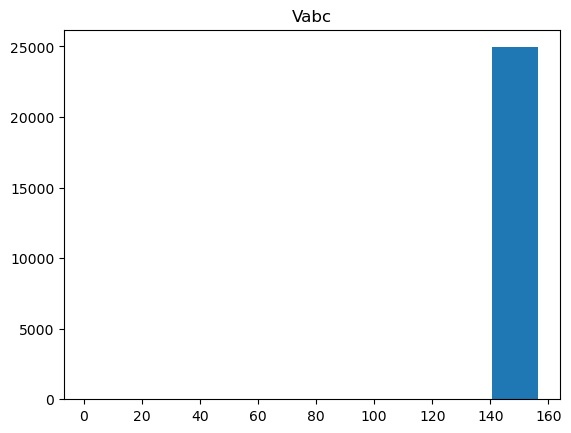

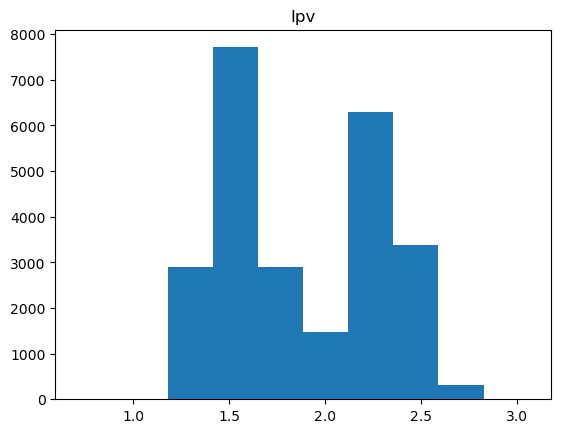

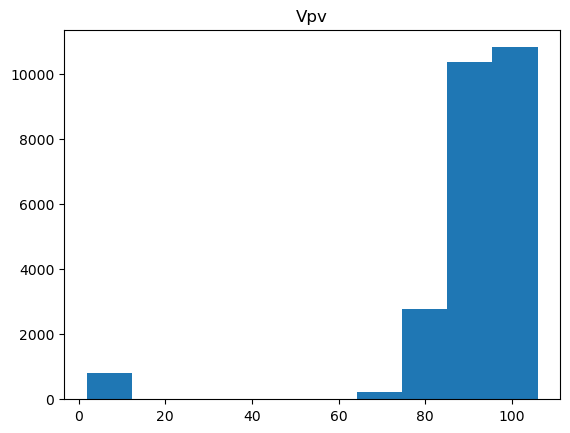

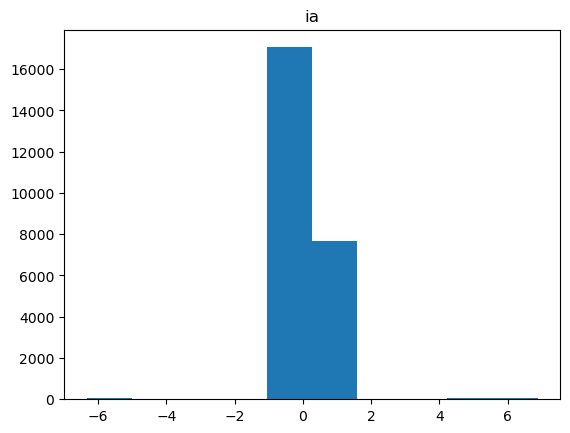

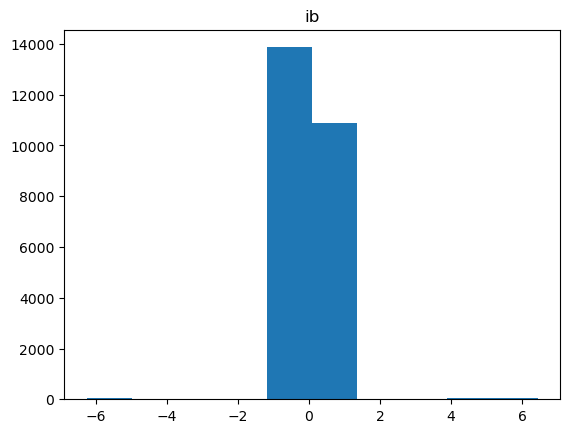

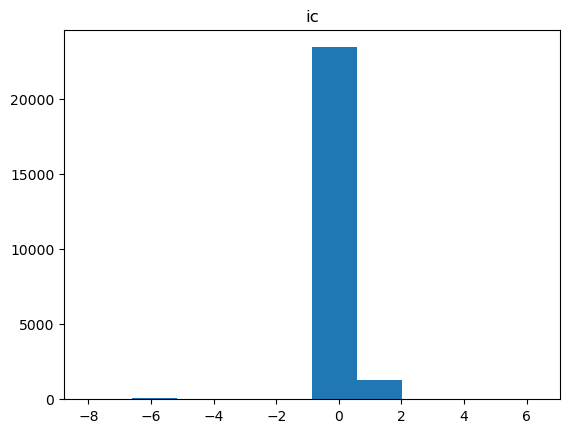

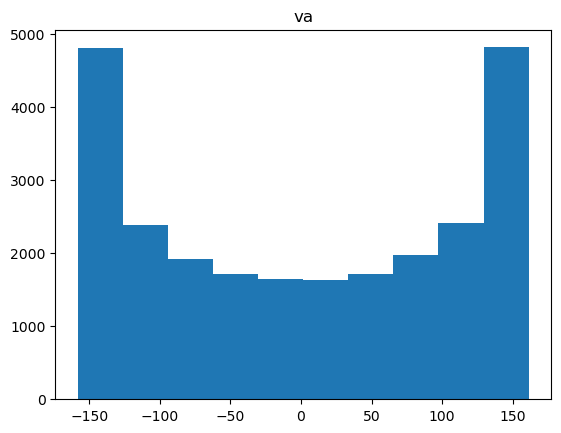

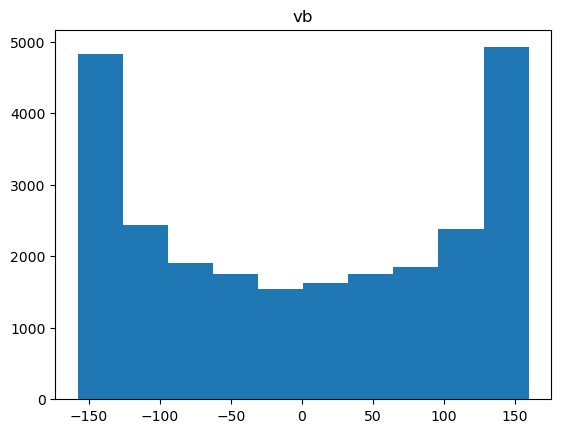

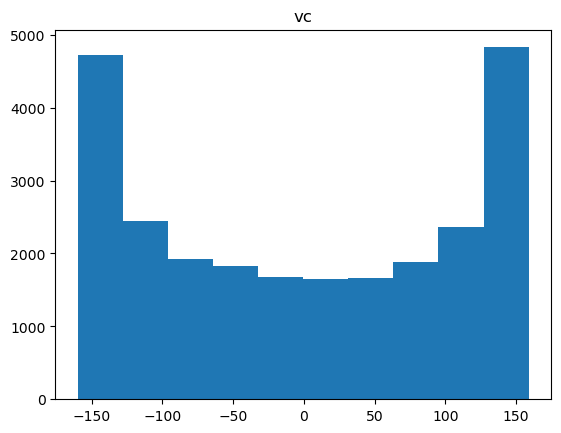

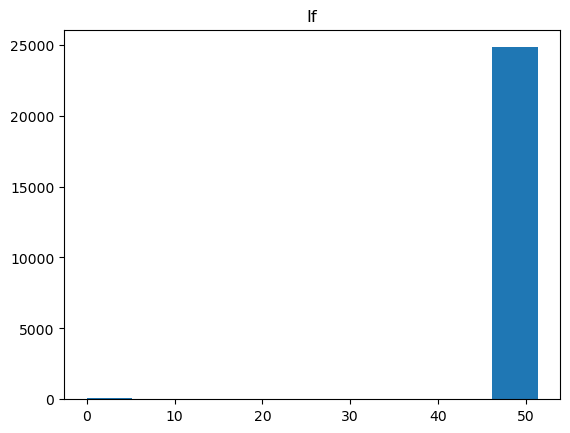

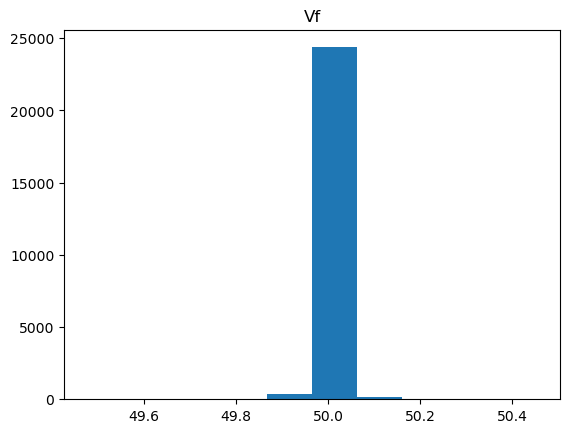

In [21]:
## Histogram for all the variables in the datset 

plt.hist(data.Iabc); plt.title('Iabc'); plt.show()
plt.hist(data.Vabc); plt.title('Vabc'); plt.show()
plt.hist(data.Ipv); plt.title('Ipv'); plt.show()
plt.hist(data.Vpv); plt.title('Vpv'); plt.show()
plt.hist(data.ia); plt.title('ia'); plt.show()
plt.hist(data.ib); plt.title('ib'); plt.show()
plt.hist(data.ic); plt.title('ic'); plt.show()
plt.hist(data.va); plt.title('va'); plt.show()
plt.hist(data.vb); plt.title('vb'); plt.show()
plt.hist(data.vc); plt.title('vc'); plt.show()
plt.hist(data.If); plt.title('If'); plt.show()
plt.hist(data.Vf); plt.title('Vf'); plt.show()

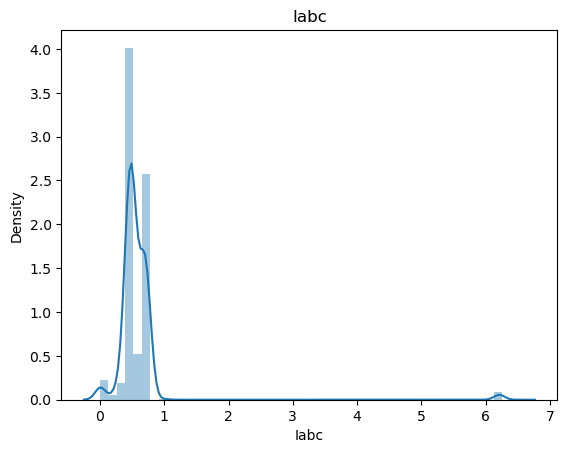

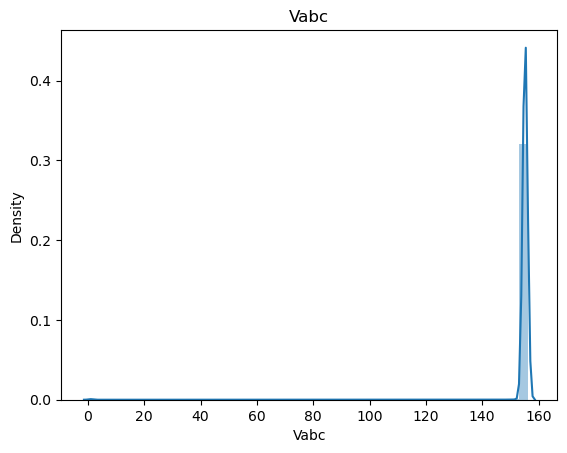

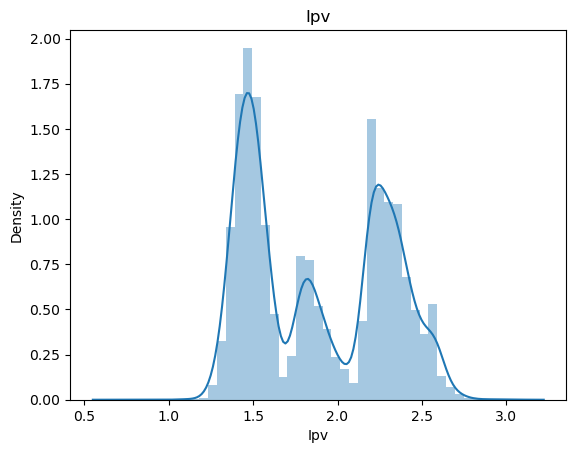

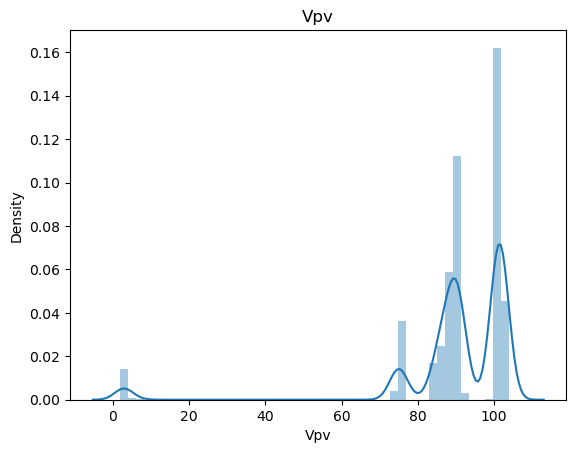

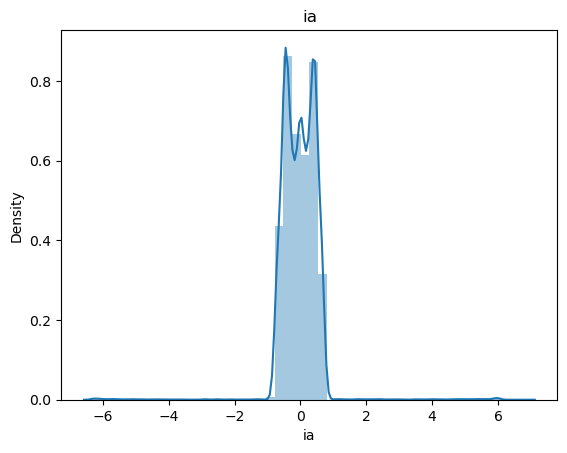

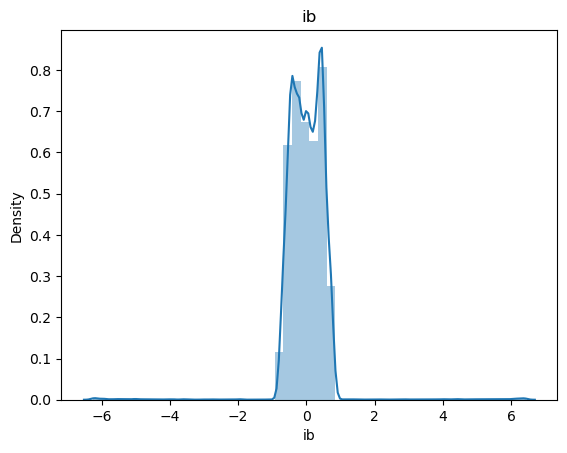

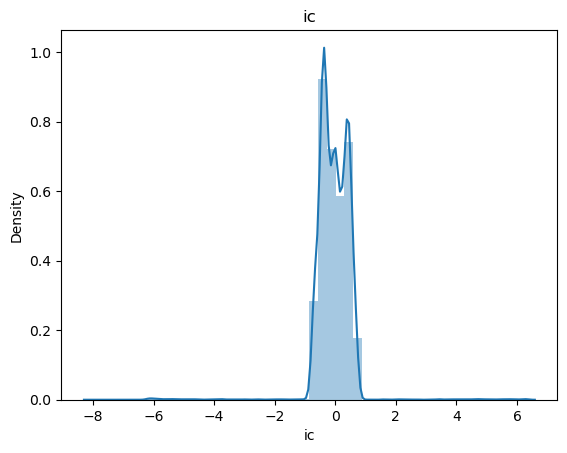

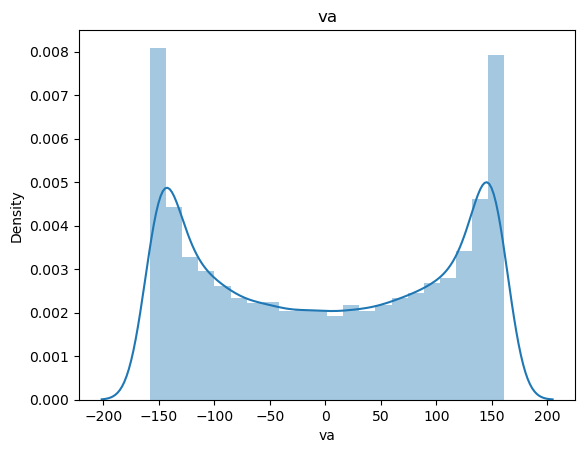

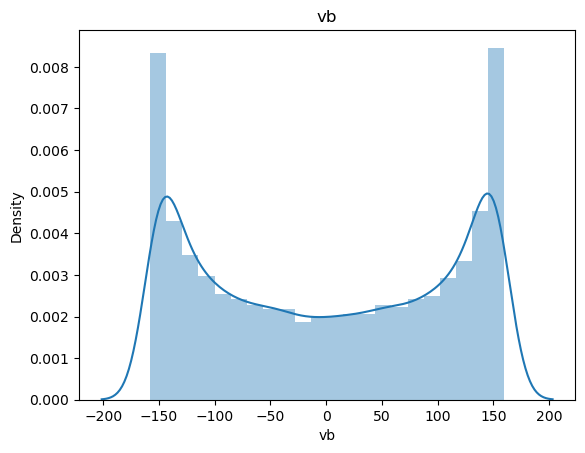

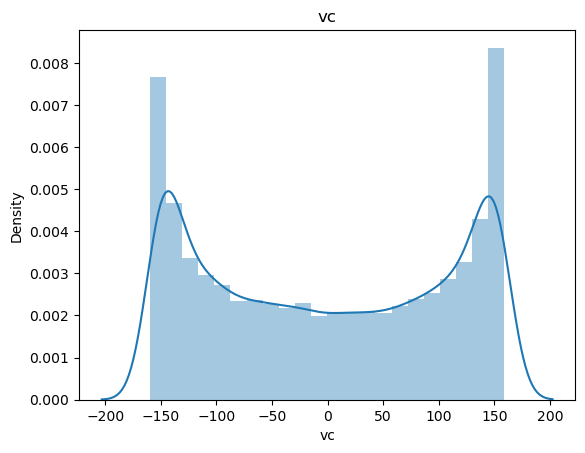

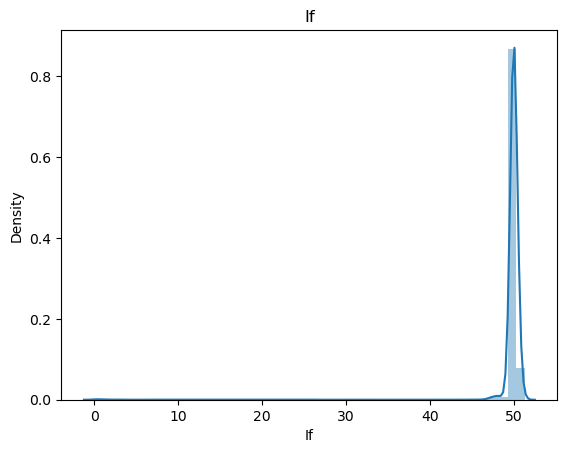

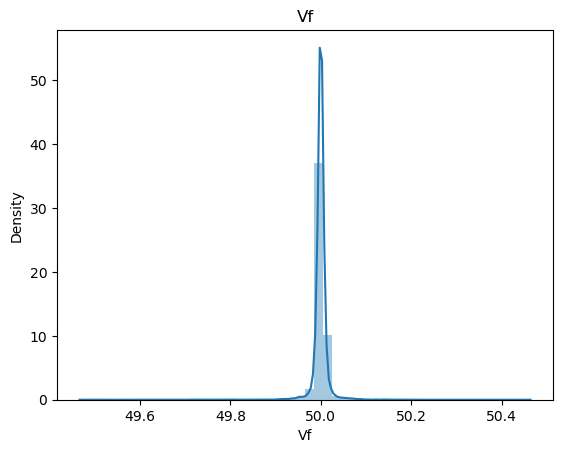

In [22]:
## Density Plot for all the variables in the datset

sns.distplot(data.Iabc); plt.title('Iabc'); plt.show()
sns.distplot(data.Vabc); plt.title('Vabc'); plt.show()
sns.distplot(data.Ipv); plt.title('Ipv'); plt.show()
sns.distplot(data.Vpv); plt.title('Vpv'); plt.show()
sns.distplot(data.ia); plt.title('ia'); plt.show()
sns.distplot(data.ib); plt.title('ib'); plt.show()
sns.distplot(data.ic); plt.title('ic'); plt.show()
sns.distplot(data.va); plt.title('va'); plt.show()
sns.distplot(data.vb); plt.title('vb'); plt.show()
sns.distplot(data.vc); plt.title('vc'); plt.show()
sns.distplot(data.If); plt.title('If'); plt.show()
sns.distplot(data.Vf); plt.title('Vf'); plt.show()

<AxesSubplot:>

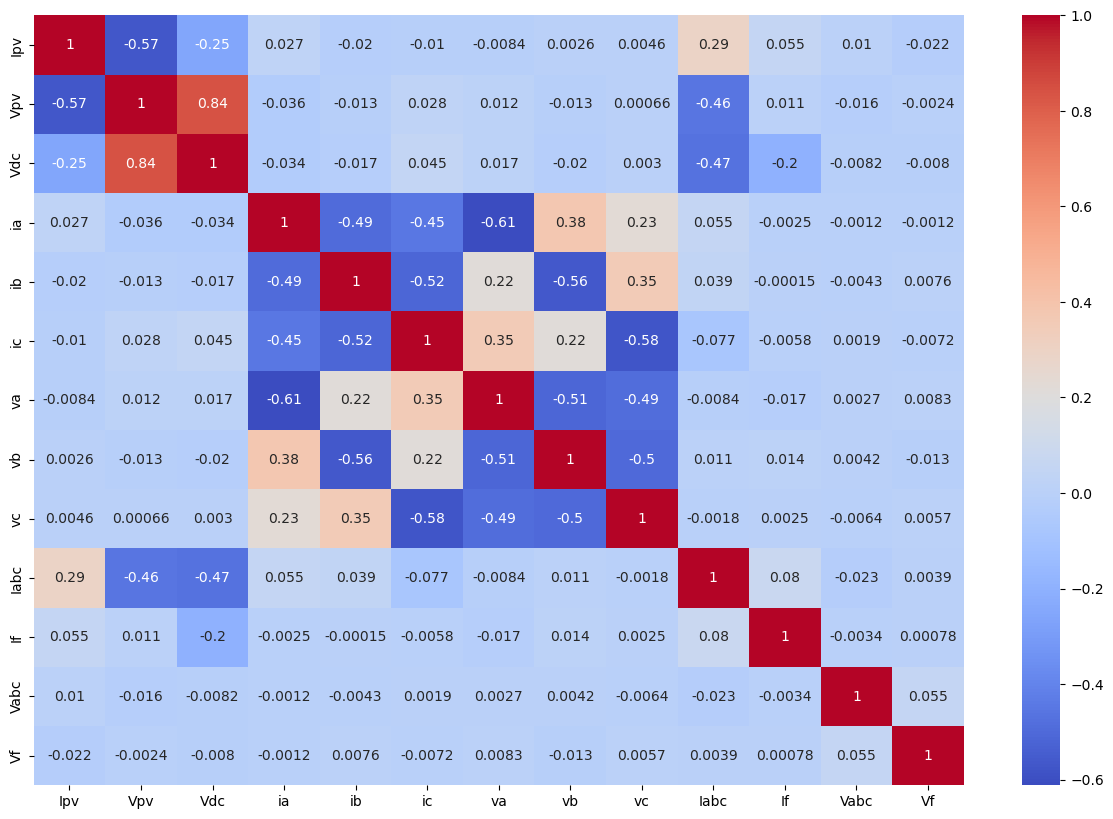

In [23]:
# Correlation coefficient
data.corr()

# Create a heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

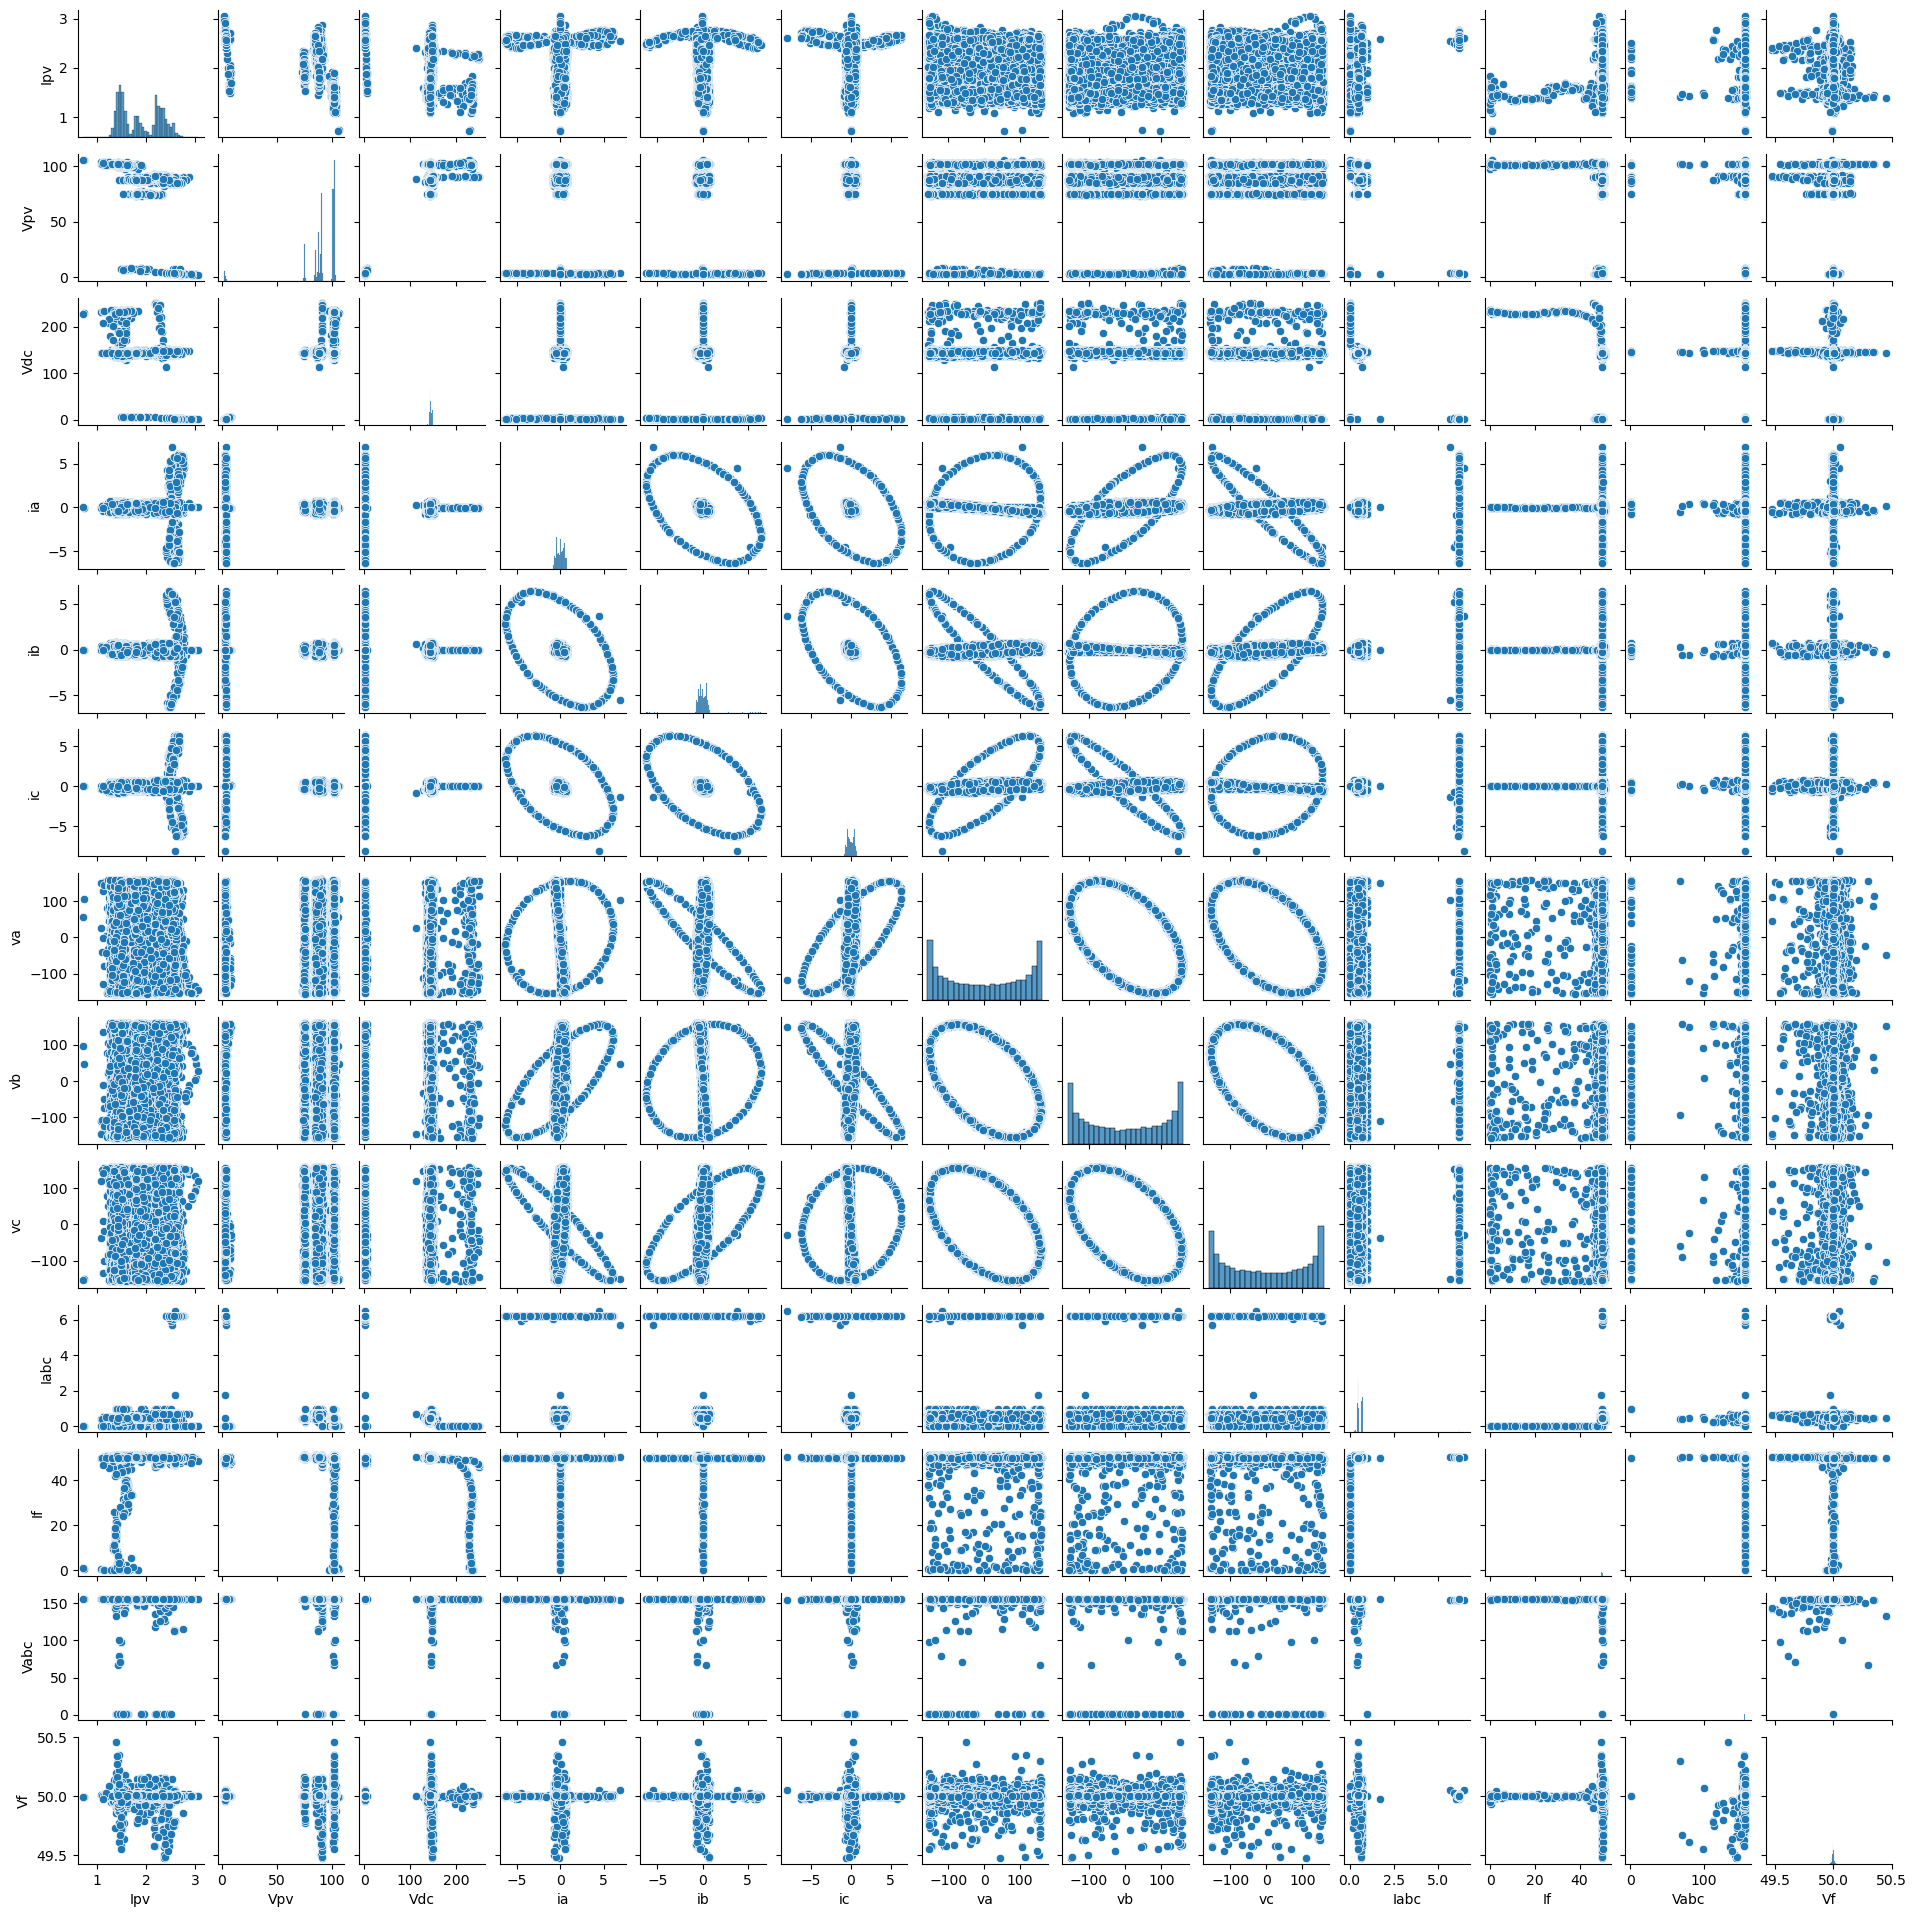

In [24]:
# Creating scatter plot for all columns 
sns.pairplot(data, height = 1.5)

                                             |                                             | [  0%]   00:00 ->…


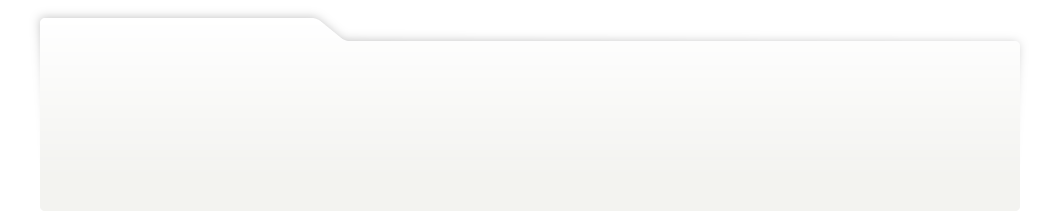
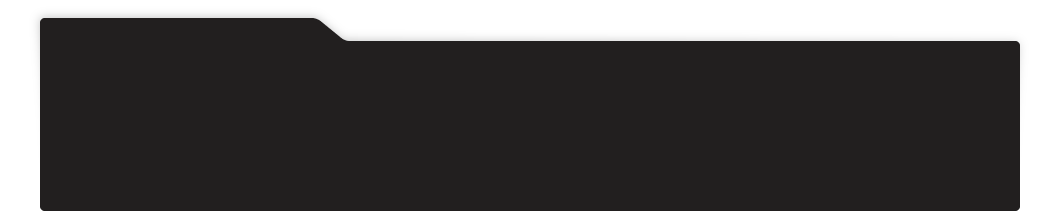
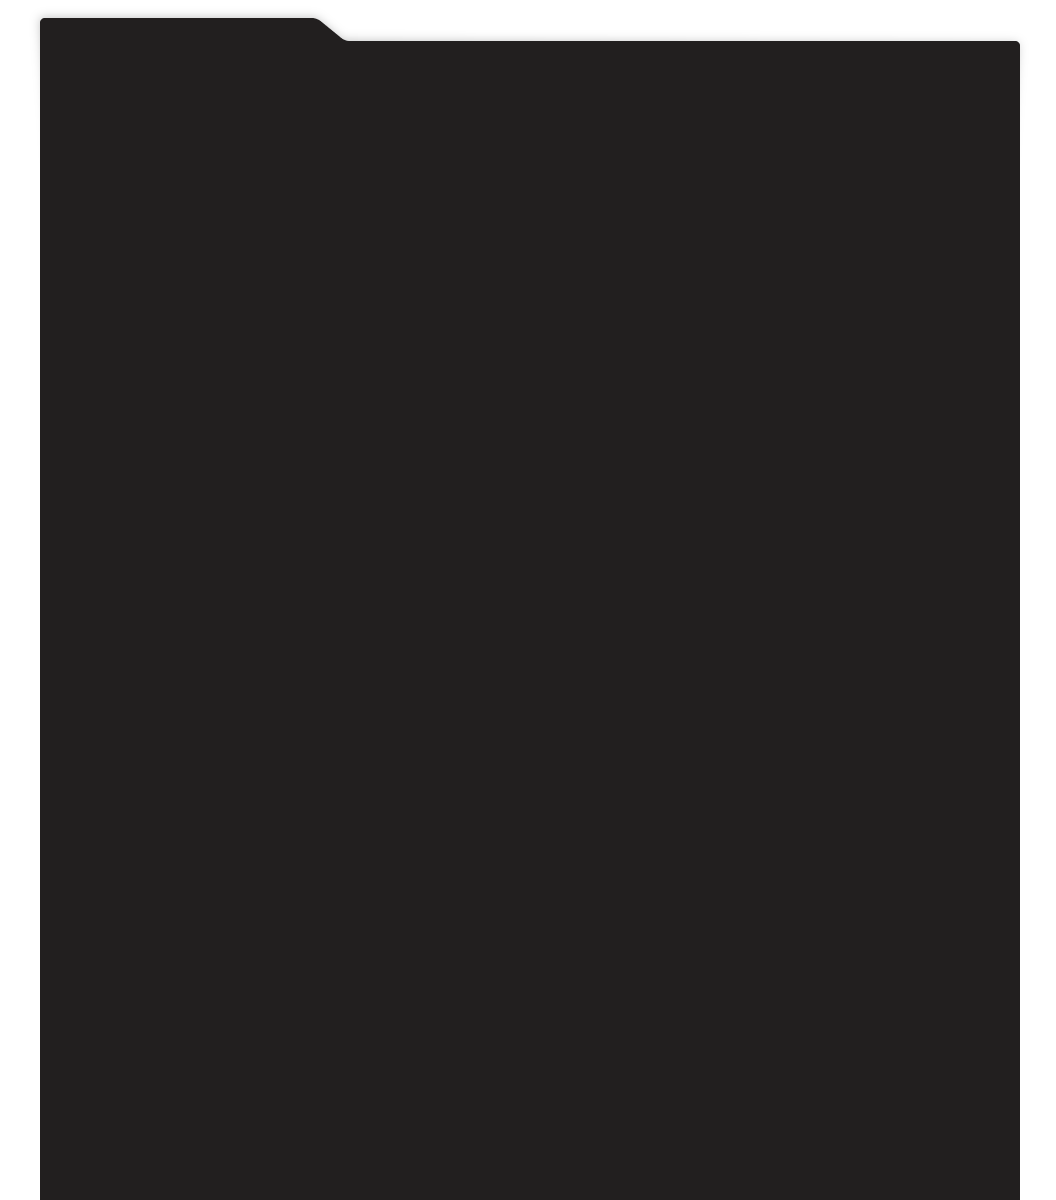
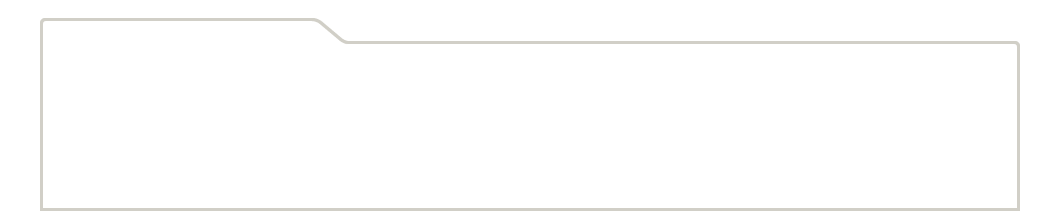
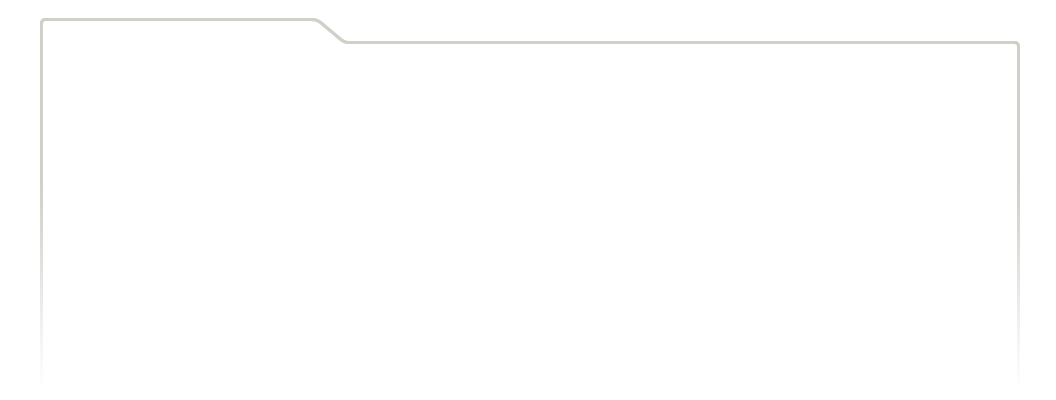
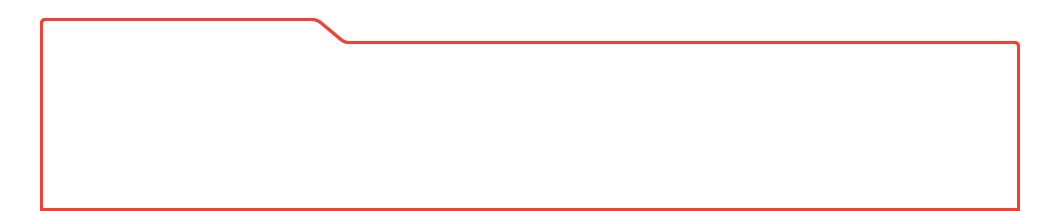
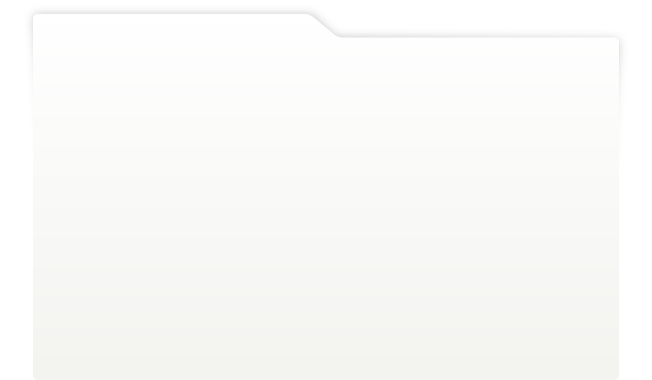
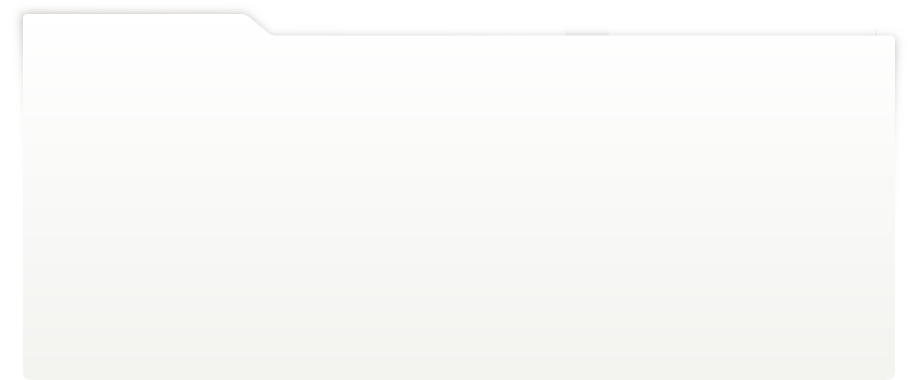
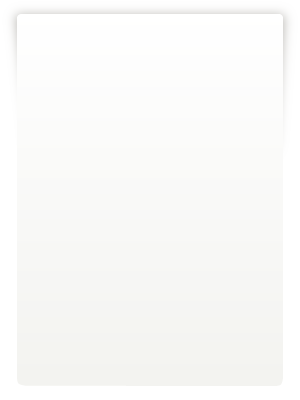
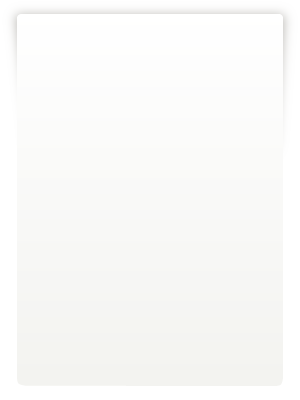
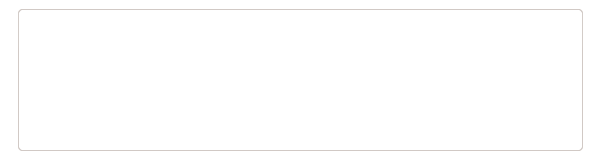
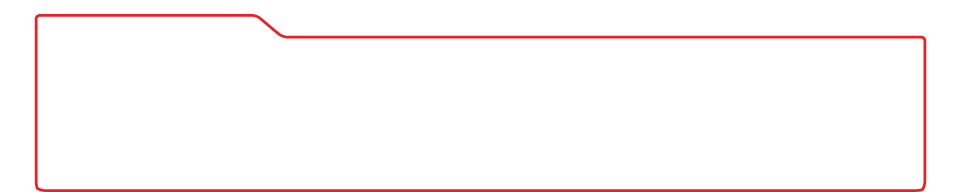
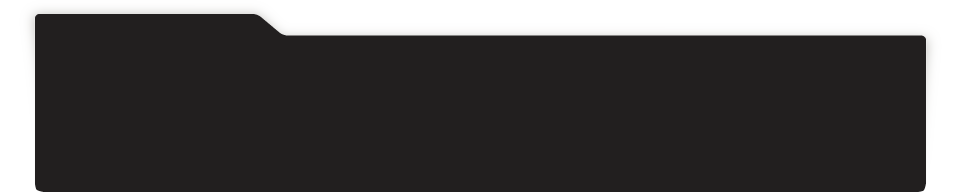
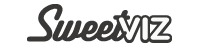
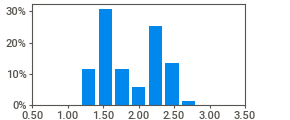
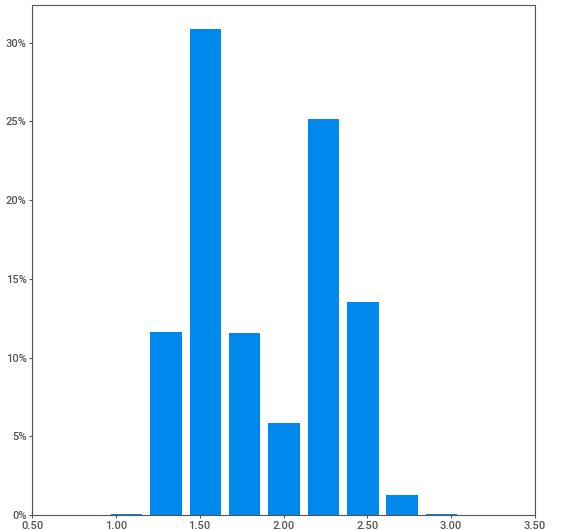
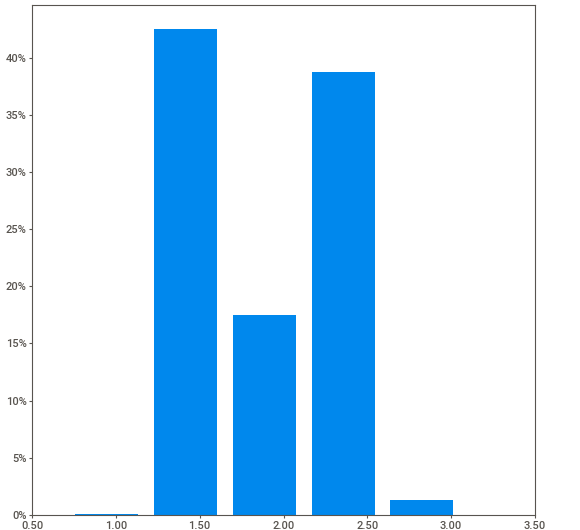
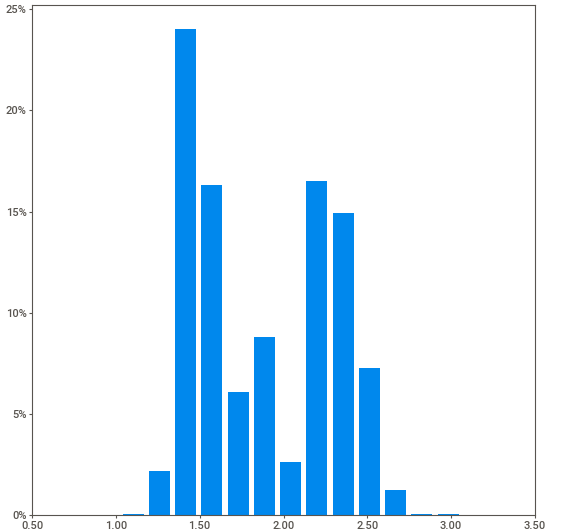
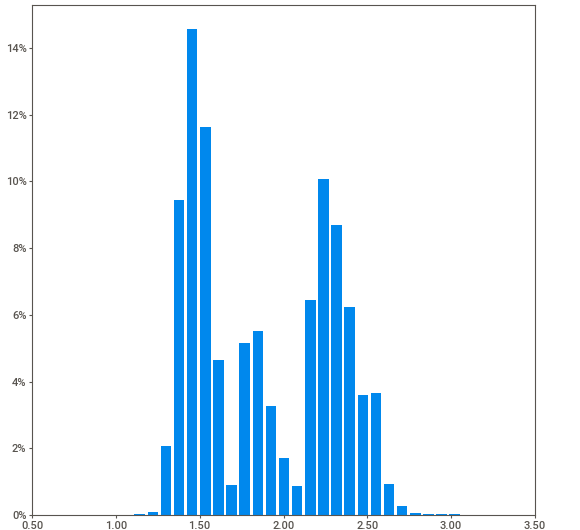
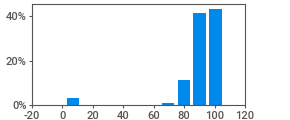
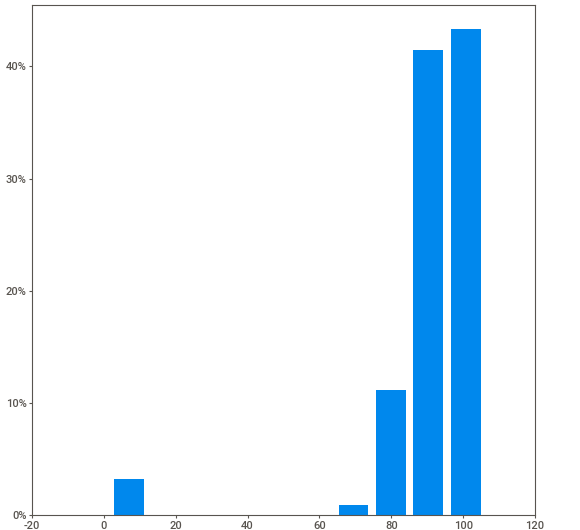
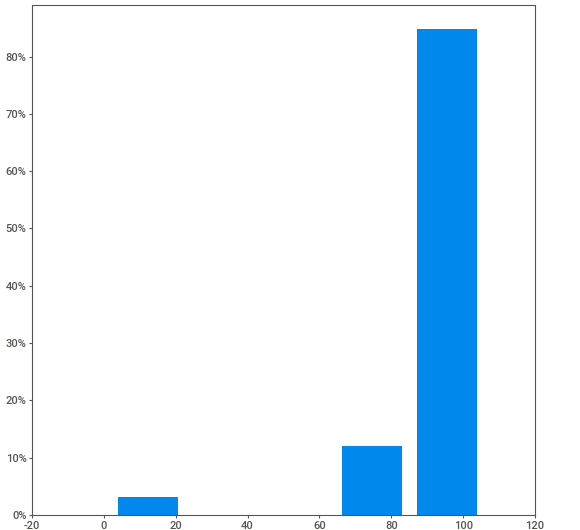
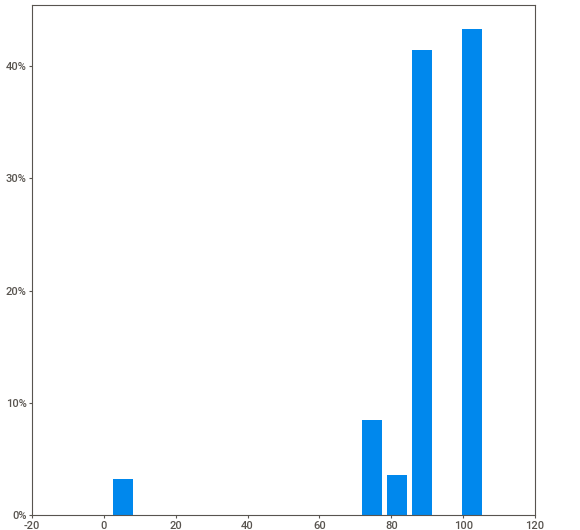
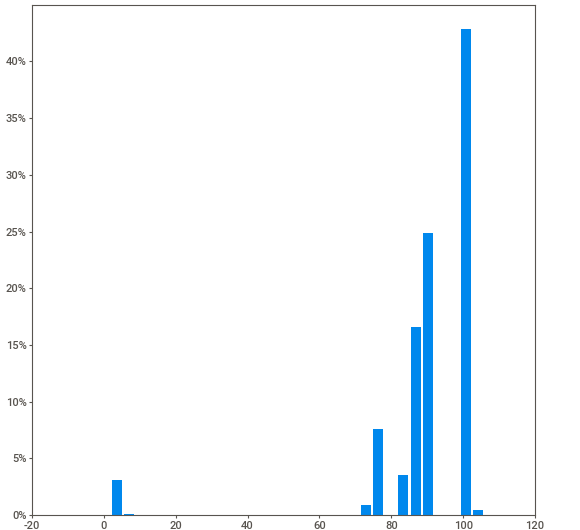
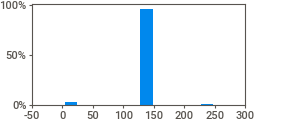
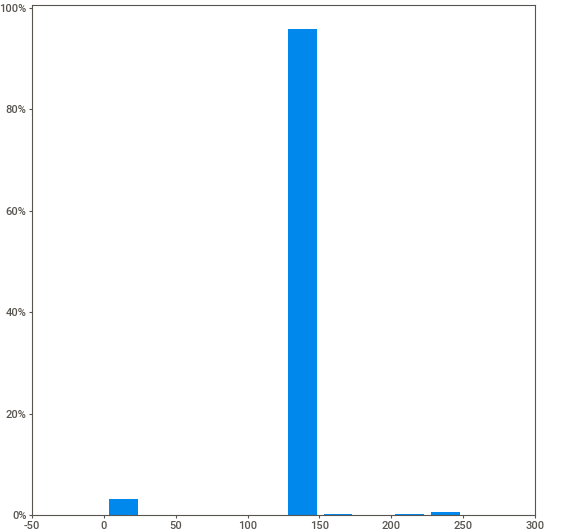
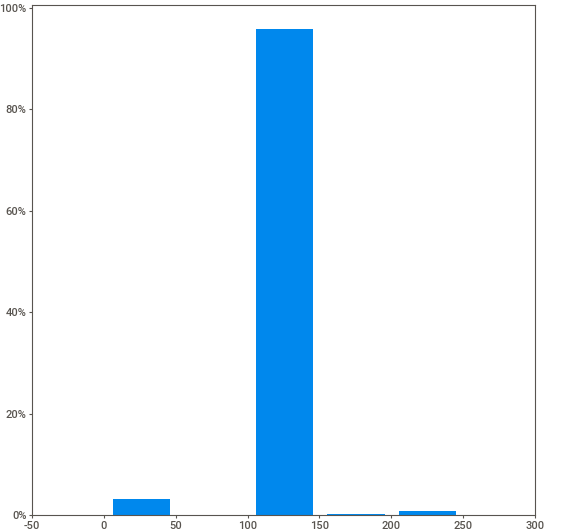
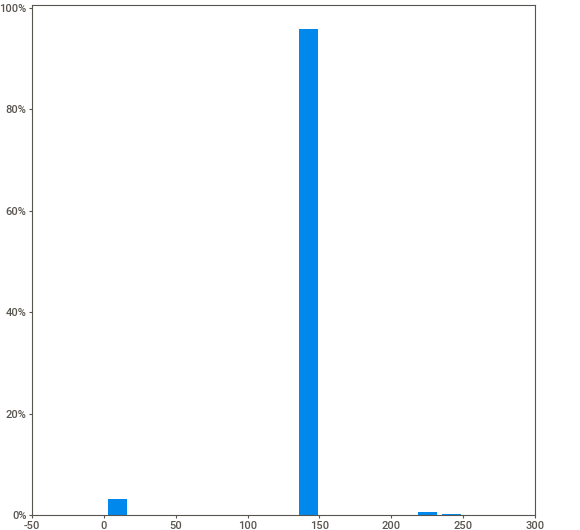
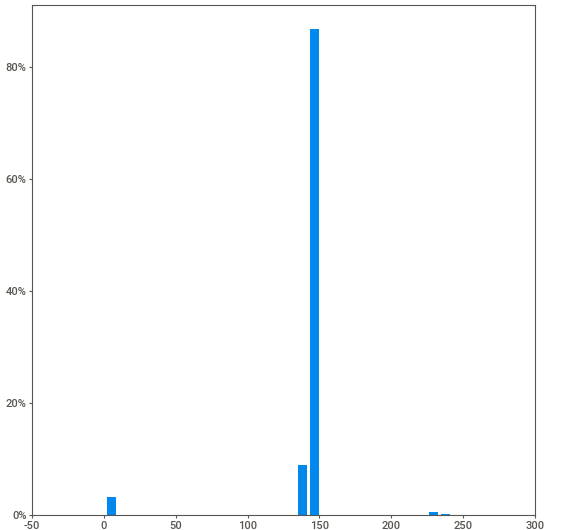
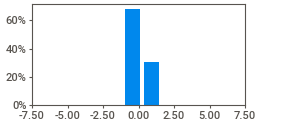
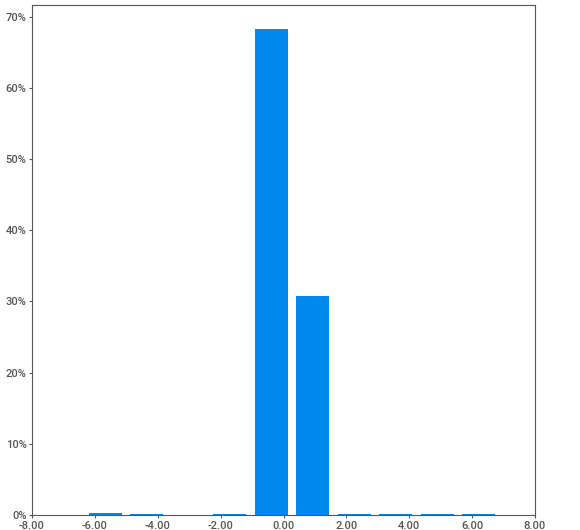
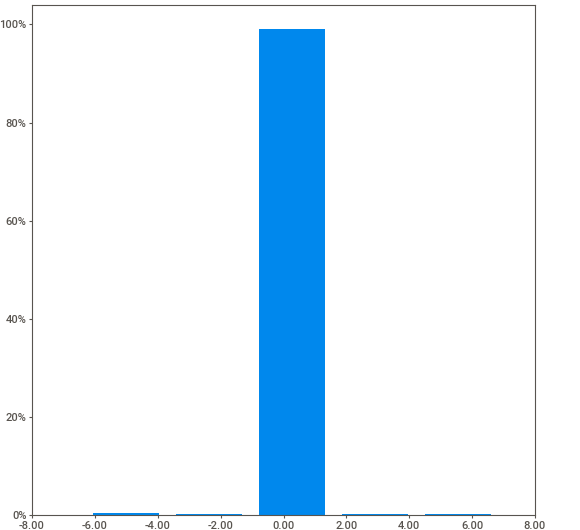
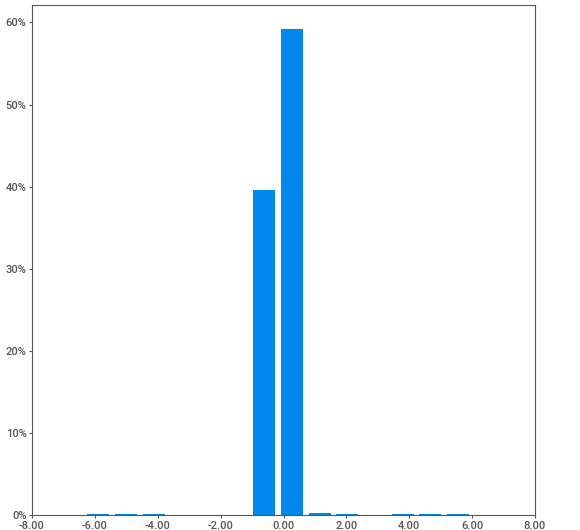
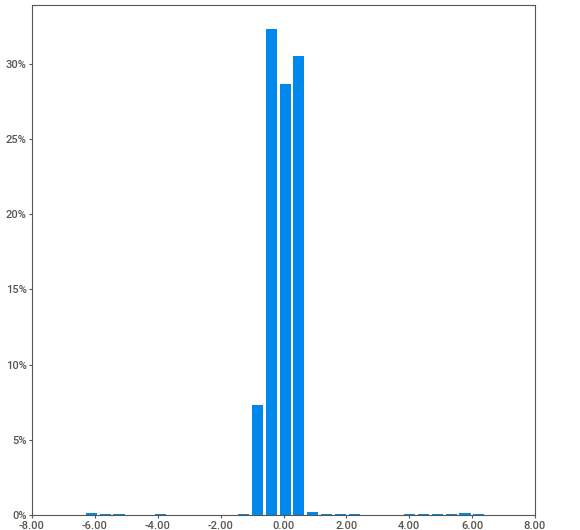
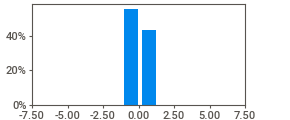
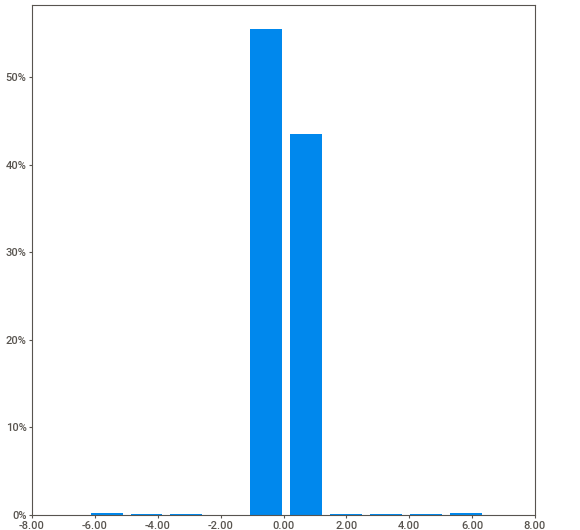
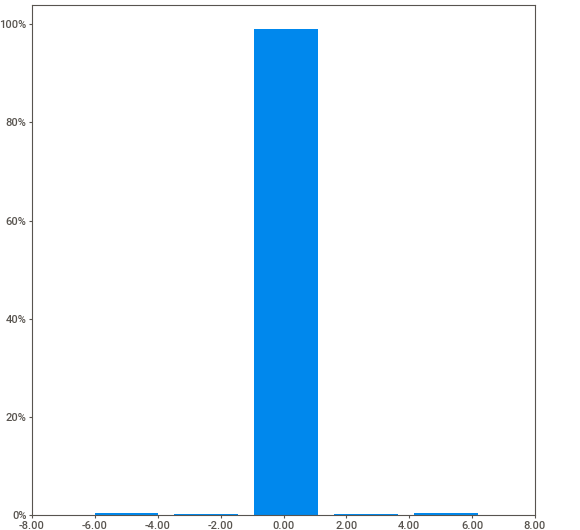
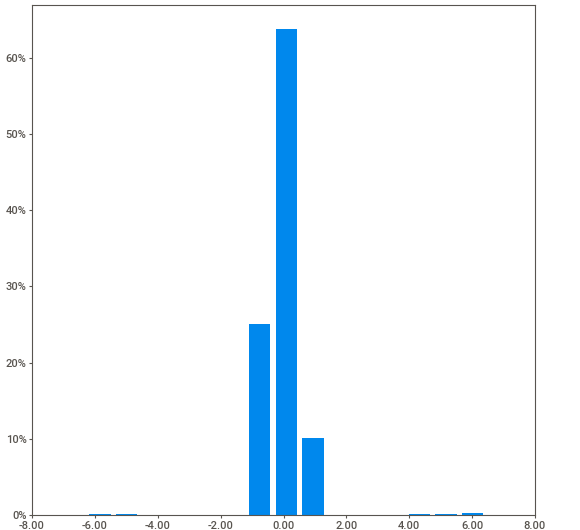
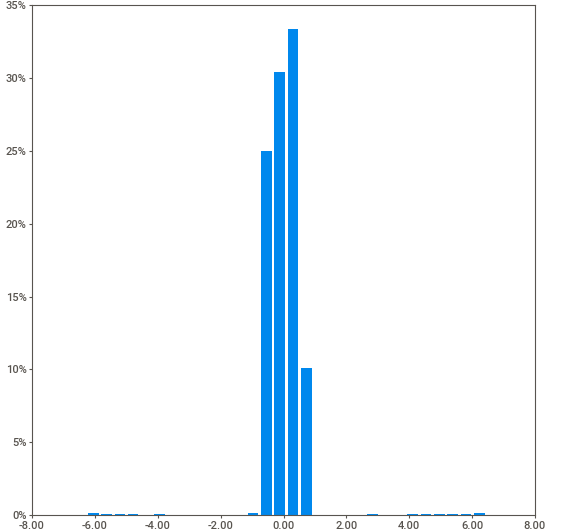
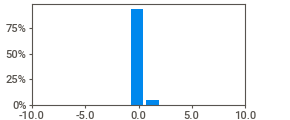
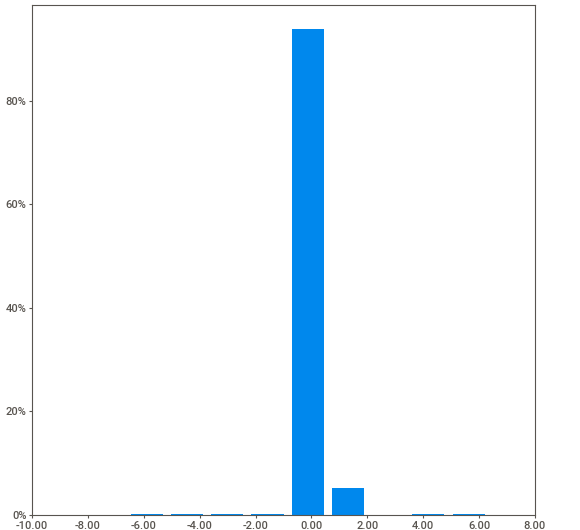
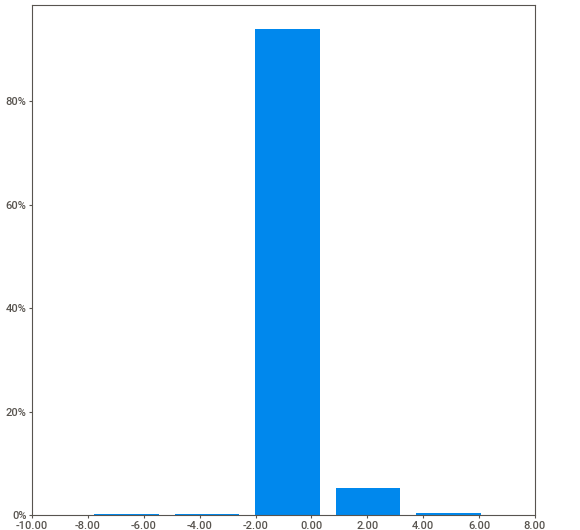
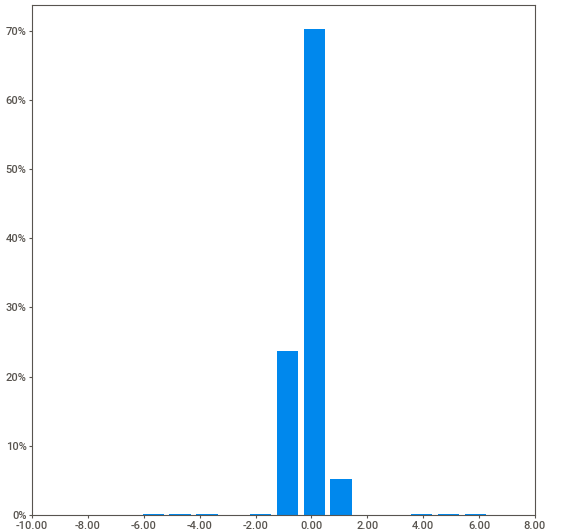
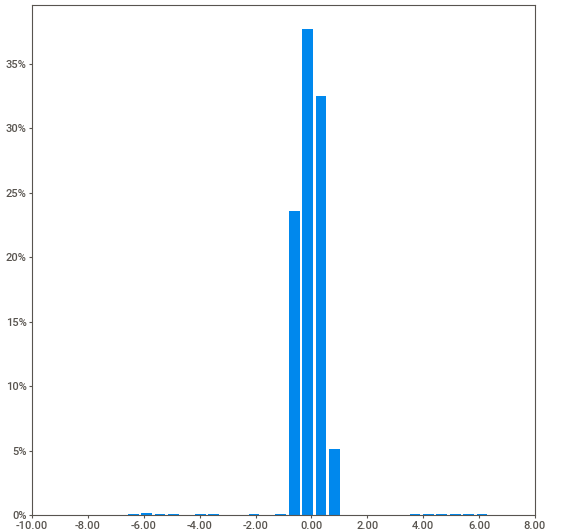
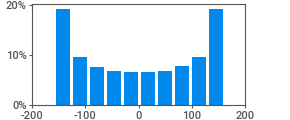
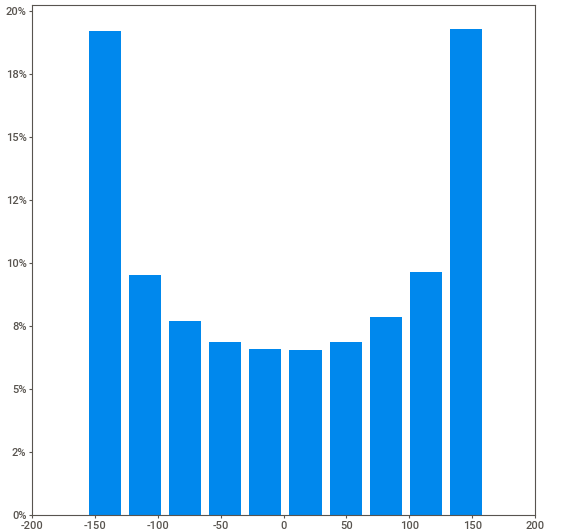
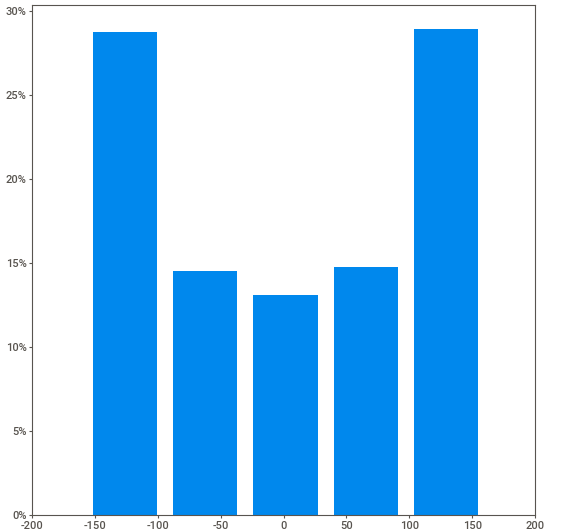
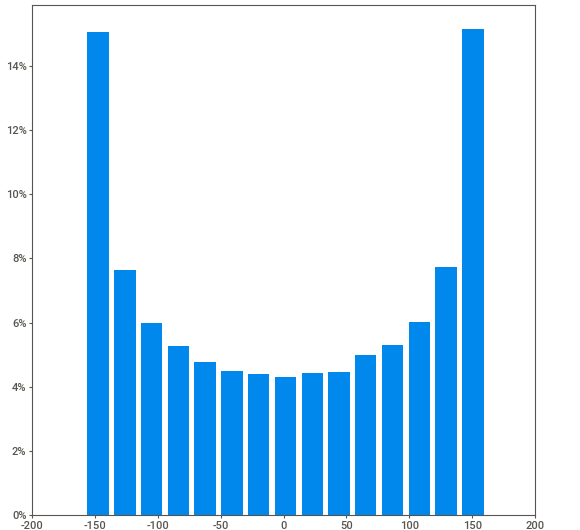
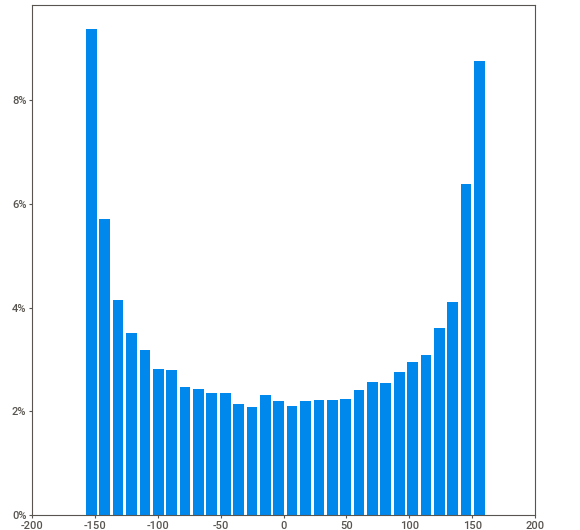
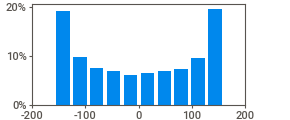
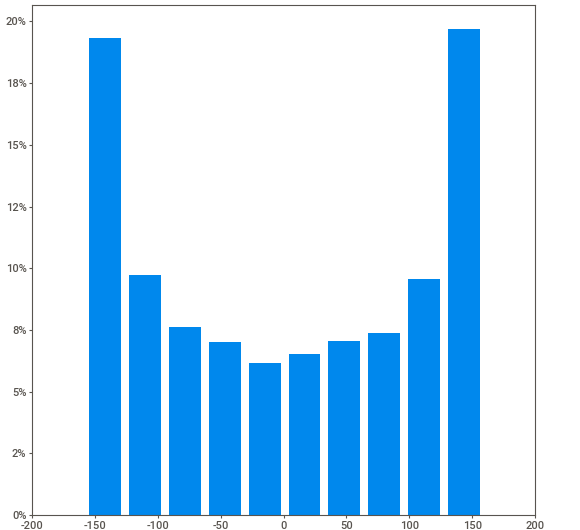
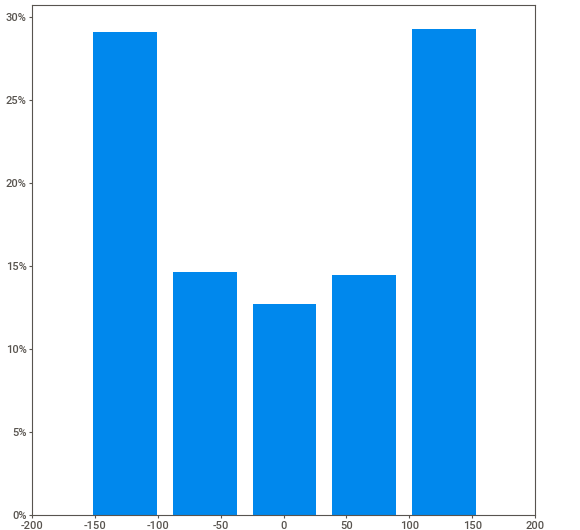
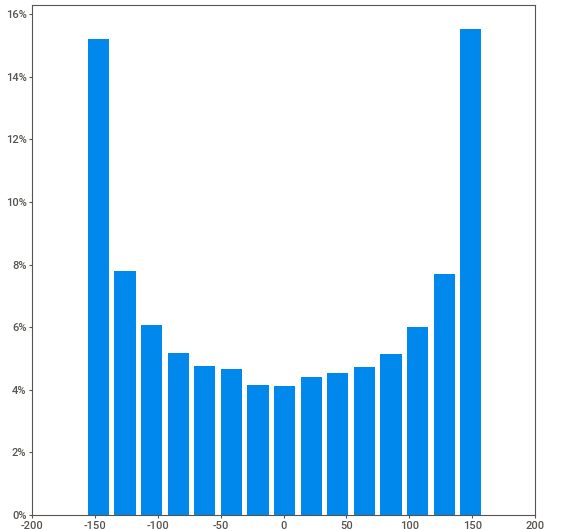
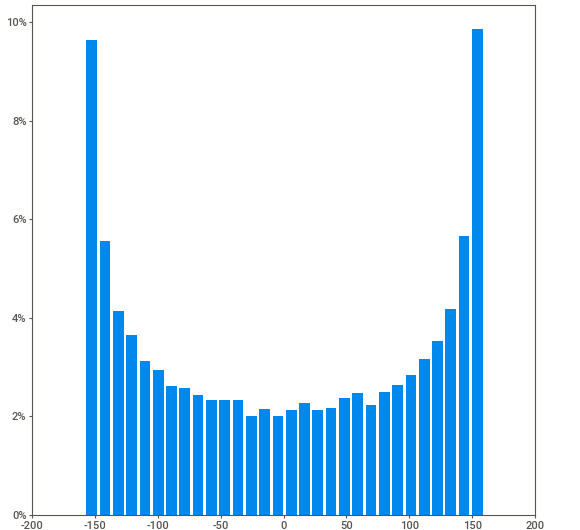
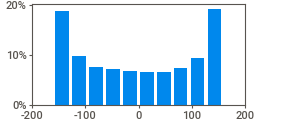
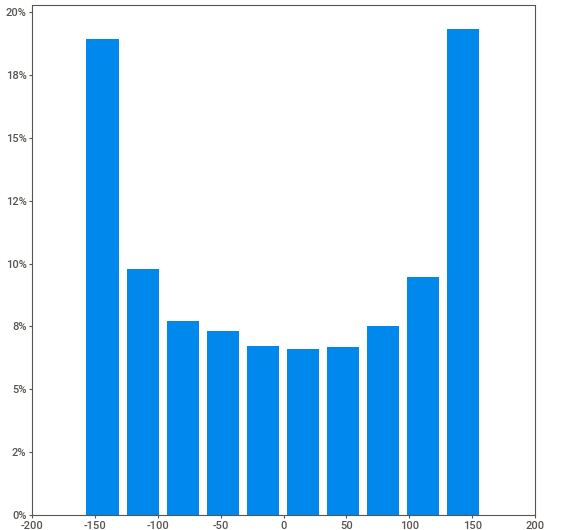
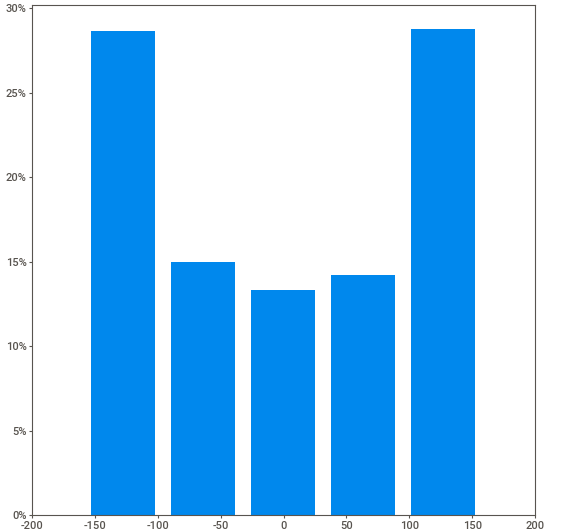
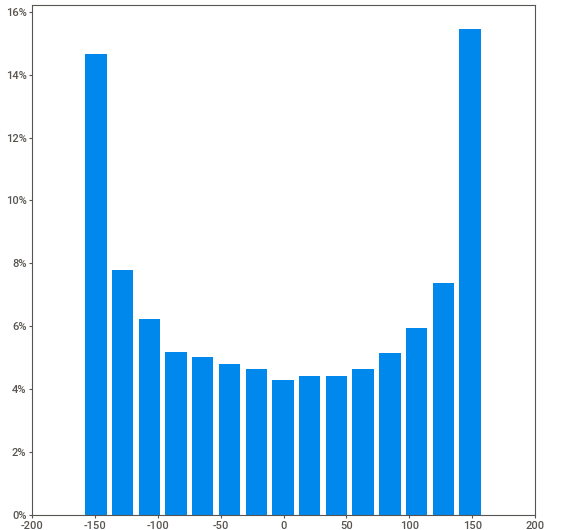
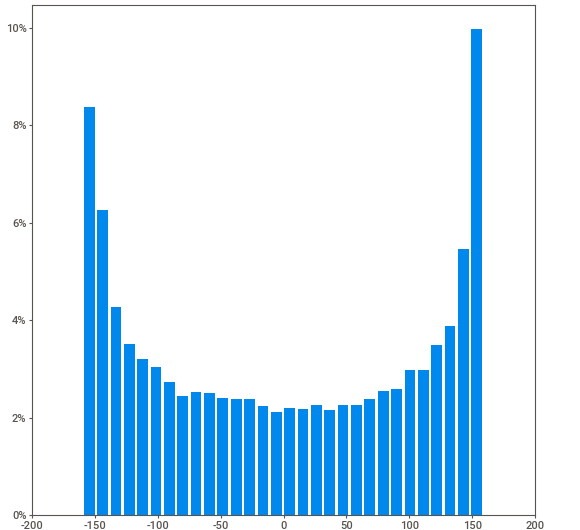
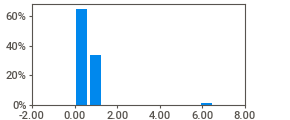
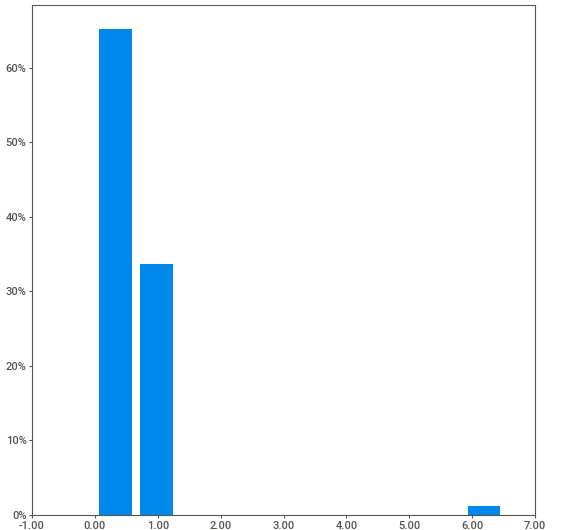
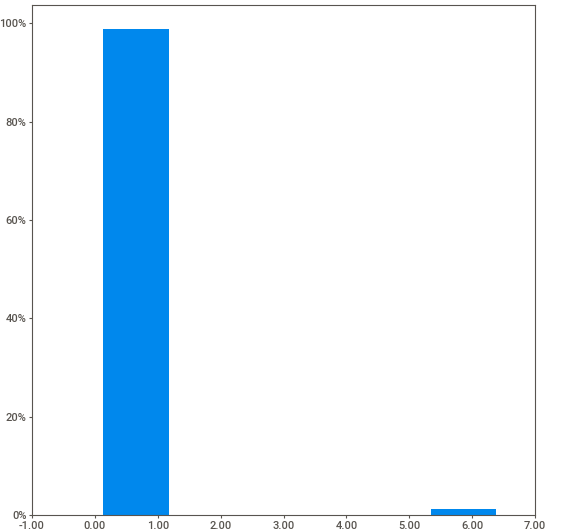
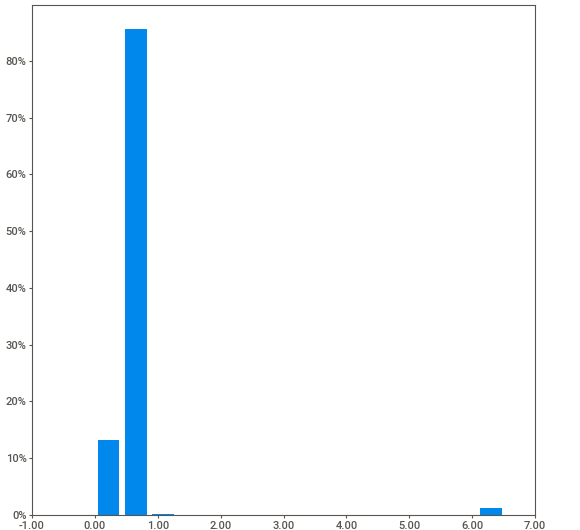
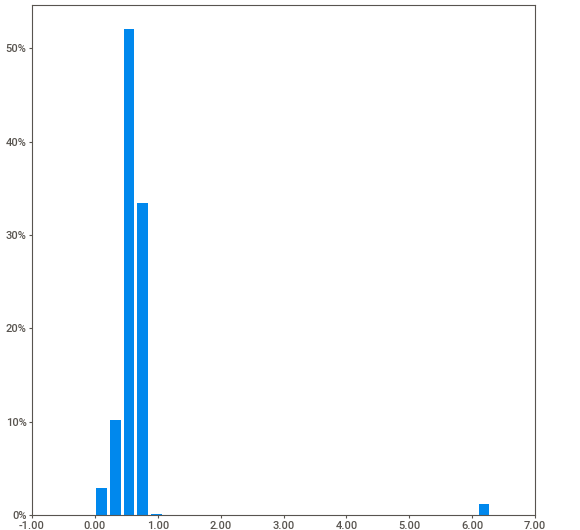
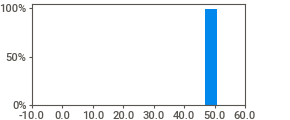
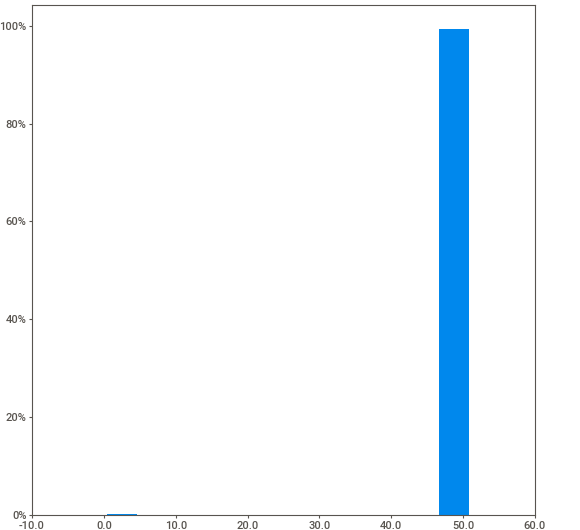
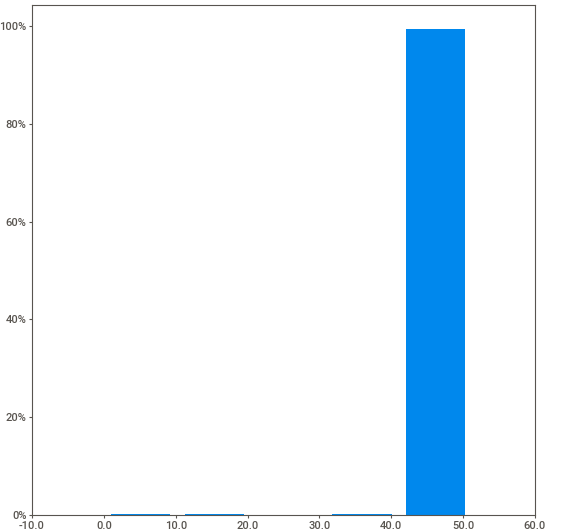
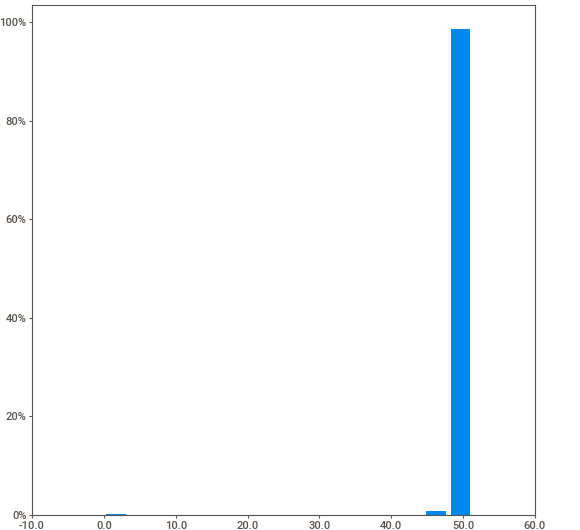
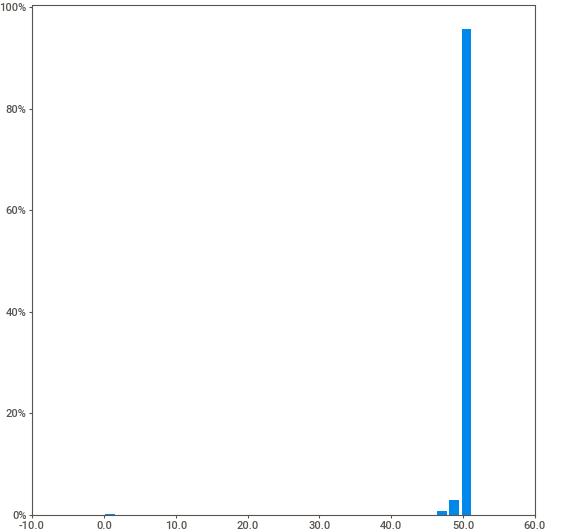
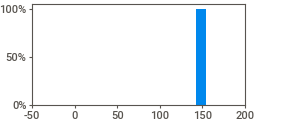
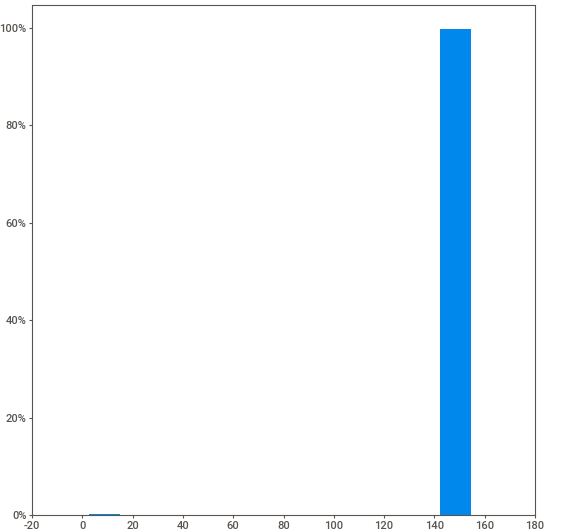
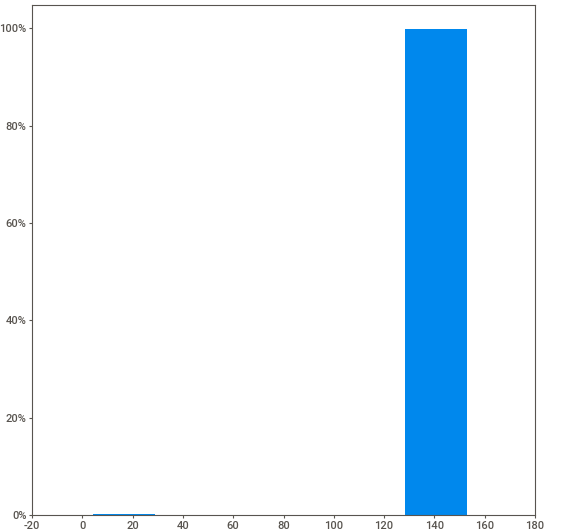
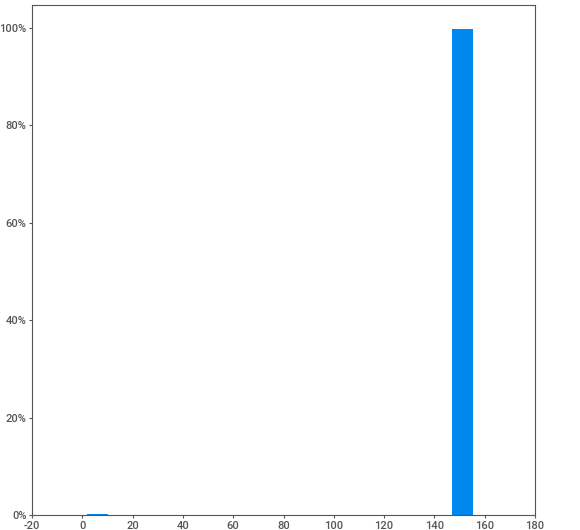
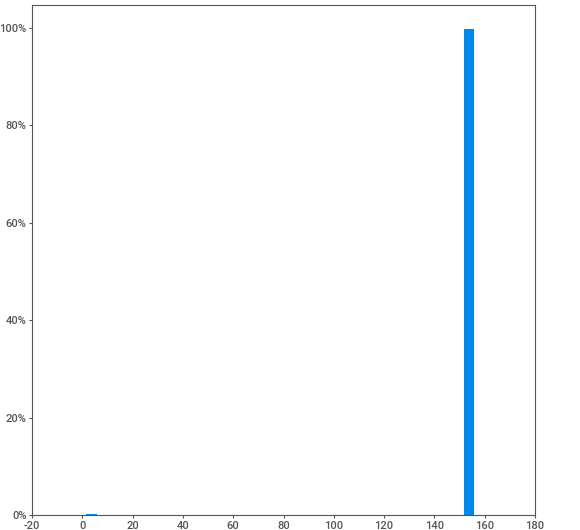
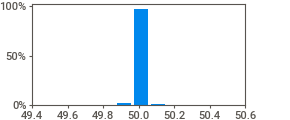
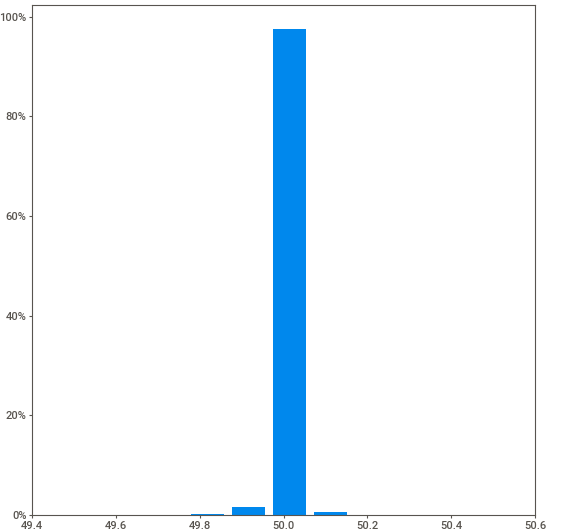
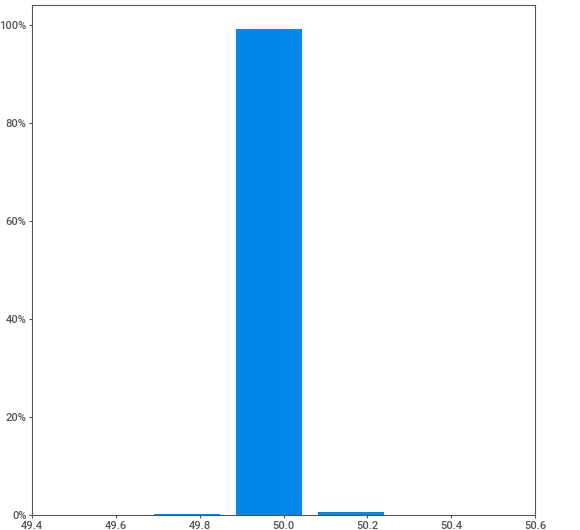
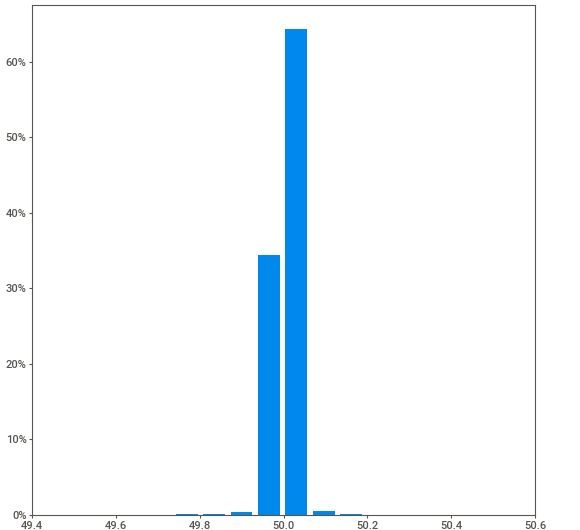
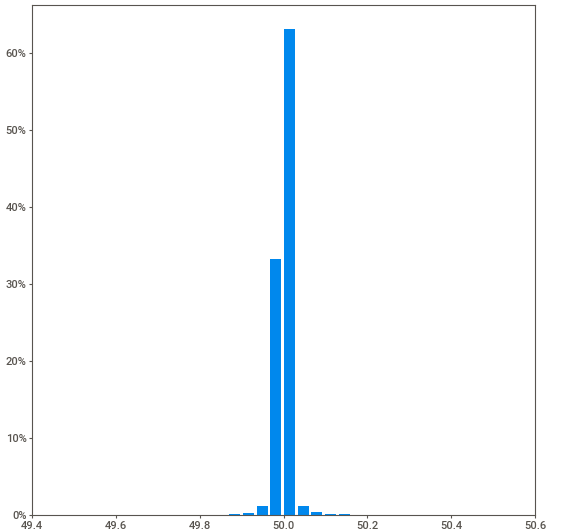
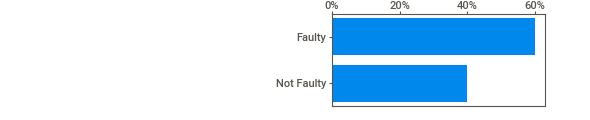
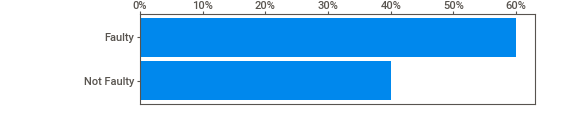
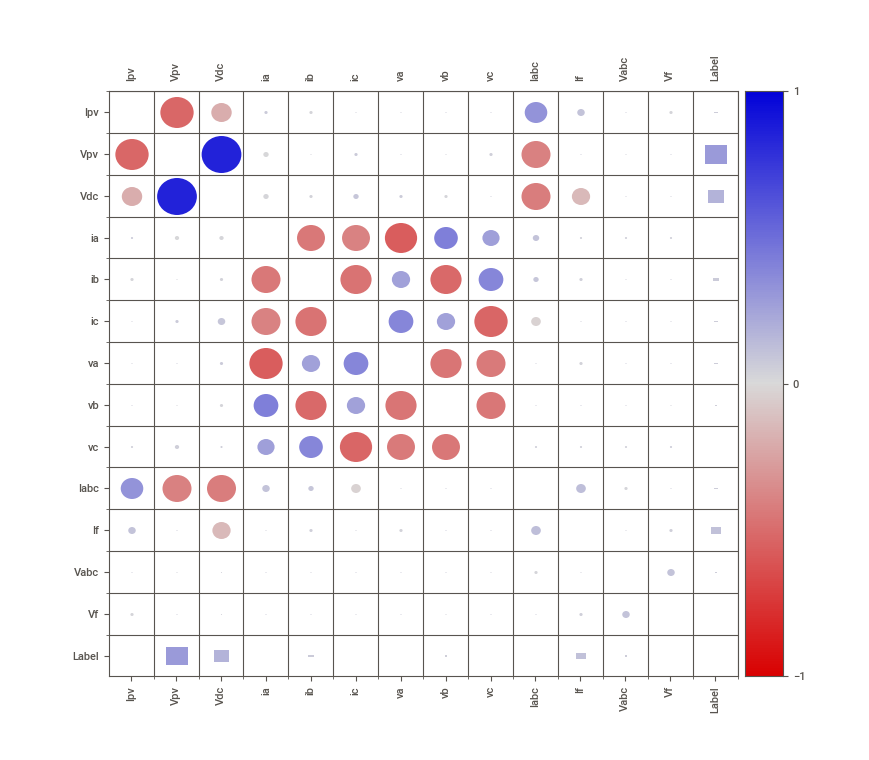
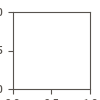

In [25]:
## pip install sweetviz
import sweetviz as sv
s = sv.analyze(data)
s.show_notebook()

# Imputation

Median imputation is a method for handling missing values in a dataset by replacing them with the median value of the complete observations in the same column. The median is the value that separates the higher half from the lower half of the data.

Median imputation is a simple and straightforward method that can be used when the missing values are missing at random (MAR) or missing completely at random (MCAR). It is particularly useful for handling missing values in continuous variables that are not normally distributed. This is because the median is robust to outliers and skewness, so it provides a good summary of the central tendency of the data even in the presence of missing values.

In [26]:
# Target variable categories
data['Label'].unique()

array(['Not Faulty', 'Faulty'], dtype=object)

In [27]:
# Data split into Input and Output
x = data.iloc[:, :13] # Predictors 
print(x)

            Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.411499  101.220703  142.968750  0.072997 -0.490112  0.336543   
1      1.560974  101.153565  141.796875  0.321410 -0.490112  0.135127   
2      1.178772  101.037598  143.554688 -0.020997  0.422974 -0.408696   
3      1.482452  101.519775  142.089844 -0.343263  0.469971 -0.126714   
4      1.474884  100.756836  142.675781  0.173705  0.268555 -0.502690   
...         ...         ...         ...       ...       ...       ...   
24995  1.836273   74.981689  145.312500 -0.242555 -0.261841  0.470820   
24996  1.809784   74.682617  142.675781  0.354979  0.073853 -0.408696   
24997  1.795593   87.762451  144.140625  0.482543 -0.255127 -0.207280   
24998  1.607330  101.306152  142.675781  0.435546 -0.261841 -0.173711   
24999  1.416229  101.928711  144.140625 -0.457398  0.496826 -0.039434   

               va          vb          vc      Iabc         If        Vabc  \
0      -26.748810  148.872376 -116.136526  0.

In [28]:
y = data.iloc[:, 13:] # Predictors 
print(y)

            Label
0      Not Faulty
1      Not Faulty
2      Not Faulty
3      Not Faulty
4      Not Faulty
...           ...
24995      Faulty
24996      Faulty
24997      Faulty
24998      Faulty
24999      Faulty

[25000 rows x 1 columns]


In [29]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf'],
      dtype='object')

In [30]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['Label'], dtype='object')

In [31]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median'))])
preprocessor = ColumnTransformer(transformers = [('impute', num_pipeline, numeric_features)])
impute = preprocessor.fit(x)

In [34]:
joblib.dump(impute, 'Median_Imputation')

['Median_Imputation']

In [35]:
imputation_data = pd.DataFrame(impute.transform(x), columns = numeric_features)
imputation_data

Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.411499  101.220703  142.968750  0.072997 -0.490112  0.336543   
1      1.560974  101.153565  141.796875  0.321410 -0.490112  0.135127   
2      1.178772  101.037598  143.554688 -0.020997  0.422974 -0.408696   
3      1.482452  101.519775  142.089844 -0.343263  0.469971 -0.126714   
4      1.474884  100.756836  142.675781  0.173705  0.268555 -0.502690   
...         ...         ...         ...       ...       ...       ...   
24995  1.836273   74.981689  145.312500 -0.242555 -0.261841  0.470820   
24996  1.809784   74.682617  142.675781  0.354979  0.073853 -0.408696   
24997  1.795593   87.762451  144.140625  0.482543 -0.255127 -0.207280   
24998  1.607330  101.306152  142.675781  0.435546 -0.261841 -0.173711   
24999  1.416229  101.928711  144.140625 -0.457398  0.496826 -0.039434   

               va          vb          vc      Iabc         If        Vabc  \
0      -26.748810  148.872376 -116.136526  0.494040  49.777418  155.448206   
1      -95.242157  153.899078  -59.404297  0.466000  50.071965  154.800179   
2        3.363190 -135.154419  132.972565  0.525218  50.042150  155.051278   
3      113.444367 -148.884430   37.348684  0.467607  50.198979  155.171126   
4      -61.055756  -87.177734  156.197459  0.491109  50.045572  155.571822   
...           ...         ...         ...       ...        ...         ...   
24995   76.184082   81.705017 -152.673543  0.482437  50.023322  155.236707   
24996 -118.905029  -21.119385  146.758830  0.455725  50.084425  155.201368   
24997 -154.212494   85.827637   67.613373  0.516475  50.077651  154.961512   
24998 -150.620270  108.923950   41.873118  0.451219  49.931206  155.302769   
24999  137.818451 -131.043854   -5.279846  0.469121  50.000826  154.977210   

              Vf  
0      50.006573  
1      50.004718  
2      50.004369  
3      50.003021  
4      50.003059  
...          ...  
24995  49.998656  
24996  49.999723  
24997  50.007515  
24998  49.998610  
24999  50.010022  

[25000 rows x 13 columns]

# Outlier Analysis #

Outlier treatment refers to the process of identifying and handling outliers in a dataset. Outliers are observations that are significantly different from the other observations in the dataset and can have a large impact on the results of statistical analysis and machine learning algorithms.

Winsorization: This method replaces outliers with a specified value, such as the maximum or minimum value within a certain range.

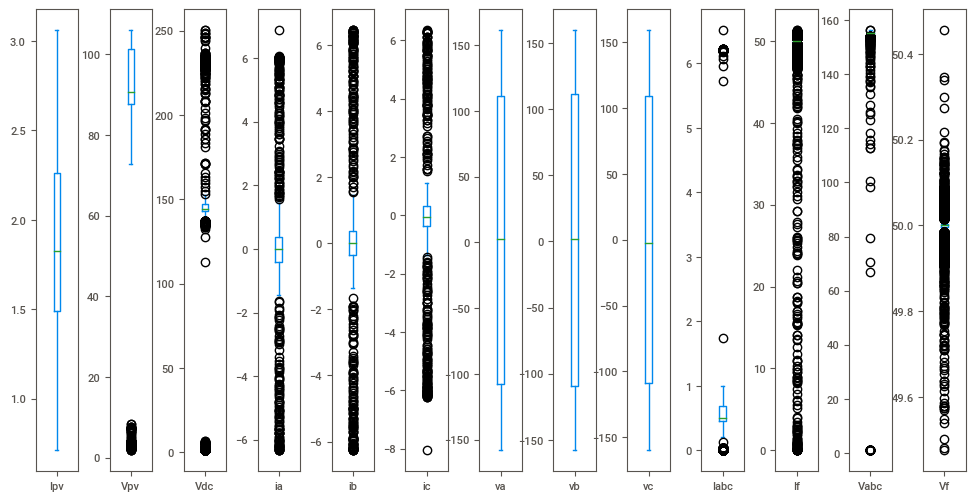

In [37]:
# Multiple boxplots in a single visualization. 
imputation_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6)) 

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [38]:
winsor = Winsorizer(capping_method = 'iqr', # choosing  IQR rule boundaries
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf'])

clean_outlier = winsor.fit(imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 
                                          'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

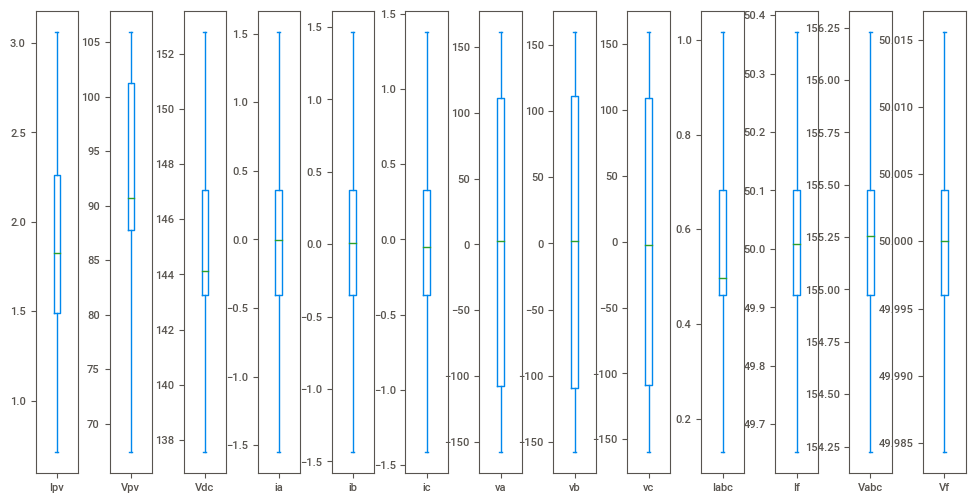

In [39]:
imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 
               'Vf']] = clean_outlier.transform(imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 
                                                                 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

imputation_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6)) 
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [40]:
# Create the pipeline
pipeline = Pipeline([('clean_outlier', Winsorizer(capping_method ='iqr', variables=['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 
                                                                                    'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc',
                                                                                    'Vf']))])

# Fit the pipeline to the data
pipeline.fit(imputation_data)

# Save the winsorizer model
joblib.dump(clean_outlier, 'Outlier_Winsorizer')

['Outlier_Winsorizer']

# Scaling - RobustScaler #

Robust scaling is a preprocessing method used in machine learning and data analysis to scale the features of a dataset in a way that is resistant to the presence of outliers. Unlike standard scaling methods, such as mean normalization or standard normalization, robust scaling methods are not sensitive to outliers and do not change the distribution of the data.

In [41]:
scale_pipeline = Pipeline([('scale', RobustScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)])
scale = scale_columntransfer.fit(imputation_data)

# Save the RobustScalar Model
joblib.dump(scale, 'RobustScalar')

['RobustScalar']

In [42]:
scaled_data = pd.DataFrame(scale.transform(imputation_data))
print(scaled_data.shape)

(25000, 13)


In [43]:
scaled_data

0         1         2         3         4         5         6   \
0     -0.533578  0.773279 -0.307692  0.105263 -0.685185  0.557692 -0.133120   
1     -0.340659  0.768331 -0.615385  0.429825 -0.685185  0.269231 -0.446002   
2     -0.833944  0.759784 -0.153846 -0.017544  0.574074 -0.509615  0.004433   
3     -0.442002  0.795322 -0.538462 -0.438596  0.638889 -0.105769  0.507289   
4     -0.451770  0.739091 -0.384615  0.236842  0.361111 -0.644231 -0.289836   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.014652 -1.160594  0.307692 -0.307018 -0.370370  0.750000  0.337082   
24996 -0.019536 -1.182636 -0.384615  0.473684  0.092593 -0.509615 -0.554095   
24997 -0.037851 -0.218623  0.000000  0.640351 -0.361111 -0.221154 -0.715381   
24998 -0.280830  0.779577 -0.384615  0.578947 -0.370370 -0.173077 -0.698972   
24999 -0.527473  0.825461  0.000000 -0.587719  0.675926  0.019231  0.618631   

             7         8         9         10        11        12  
0      0.668025 -0.522104 -0.010865 -1.281110  0.381791  0.835987  
1      0.690835 -0.261439 -0.137316  0.358476 -0.911048  0.598403  
2     -0.620819  0.622463  0.129735  0.192512 -0.410096  0.553649  
3     -0.683122  0.183105 -0.130068  1.065496 -0.170994  0.380938  
4     -0.403112  0.729173 -0.024080  0.211561  0.628409  0.385874  
...         ...       ...       ...       ...       ...       ...  
24995  0.363236 -0.689978 -0.063189  0.087705 -0.040158 -0.178132  
24996 -0.103356  0.685806 -0.183648  0.427835 -0.110661 -0.041459  
24997  0.381943  0.322161  0.090310  0.390123 -0.589183  0.956589  
24998  0.486749  0.203894 -0.203971 -0.425056  0.091638 -0.183944  
24999 -0.602166 -0.012757 -0.123238 -0.037517 -0.557865  1.277767  

[25000 rows x 13 columns]

# Model Building with Supervised Learning Techniques

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
import sklearn.metrics as skmet
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [46]:
# Checking unique categories/ classes in the Output 
data['Label'].unique()
data['Label'].value_counts()

Faulty        15000
Not Faulty    10000
Name: Label, dtype: int64

In [47]:
# Defining Input and Output Variable 
X = data.drop('Label', axis=1)
y = data['Label']

In [48]:
# Splitting data into Training & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [49]:
X_train.shape

(20000, 13)

In [50]:
X_test.shape

(5000, 13)

# Decision Tree

A decision tree is a tree-based model used for supervised learning in classification and regression problems. It works by dividing the feature space into smaller regions, called leaf nodes, based on the values of the input features. The goal of the decision tree is to predict the target variable based on the values of the input features by making a series of decisions that are represented by the branches of the tree.

Each internal node of the tree represents a test on one of the features, and the branches represent the outcome of the test. The leaves represent the final prediction of the target variable based on the values of the input features.

The decision tree model is simple to understand and interpret, and it can handle both numerical and categorical features. However, decision trees are prone to overfitting, especially when the trees become very deep and complex. 

In [51]:
# Train the decision tree classifier
DT = DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [52]:
# Evaluate on Train Data

#Predict on the Train Data
DT_pred_Train = DT.predict(X_train)

# Accuracy on Train Data
DT_Train_Accuracy = accuracy_score(y_train, DT_pred_Train)
print("DT_Train_Accuracy:", DT_Train_Accuracy)

DT_Train_Accuracy: 0.9487


In [53]:
#Confusion Matrix on Train Data using Decision Tree
pd.crosstab(y_train, DT_pred_Train, rownames = ['Actual'], colnames= ['Predictions'])

Predictions  Faulty  Not Faulty
Actual                         
Faulty        11350         671
Not Faulty      355        7624

In [54]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, DT_pred_Train))

              precision    recall  f1-score   support

      Faulty       0.97      0.94      0.96     12021
  Not Faulty       0.92      0.96      0.94      7979

    accuracy                           0.95     20000
   macro avg       0.94      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [55]:
# Evalute on Test data

# Predict on the test set
DT_pred_Test = DT.predict(X_test)

# Accuracy on Test Data
Test_DT_Accuracy = accuracy_score(y_test, DT_pred_Test)
print("DT_Test_Accuracy:", Test_DT_Accuracy)

DT_Test_Accuracy: 0.9346


In [56]:
#Confusion Matrix on Test Data using Decision Tree
pd.crosstab(y_test, DT_pred_Test, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions  Faulty  Not Faulty
Actual                         
Faulty         2774         205
Not Faulty      122        1899

In [57]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, DT_pred_Test))

              precision    recall  f1-score   support

      Faulty       0.96      0.93      0.94      2979
  Not Faulty       0.90      0.94      0.92      2021

    accuracy                           0.93      5000
   macro avg       0.93      0.94      0.93      5000
weighted avg       0.94      0.93      0.93      5000



**Hyperparameter Optimization - GridSearchCV**

The GridSearchCV class in the scikit-learn library is a meta-estimator that performs a search for the best hyperparameters of a given model using cross-validation. It works by defining a grid of hyperparameters, and then training and evaluating the model for each combination of hyperparameters in the grid. The best hyperparameters are then selected based on the performance of the model.

When using GridSearchCV with a decision tree model, the hyperparameters that can be optimized include parameters such as the maximum depth of the tree, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node, and the criterion used to measure the quality of a split.

In [58]:
### Decision Tree with GridSearchCV
# Decision tree model
dtree_model = DecisionTreeClassifier()

# Define Hyperparameters grid for GridSearchCV
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 21)}

# Initialise GridSearchCV
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

# Fit GridSearchCV to the Data
dt_gsc = dtree_gscv.fit(X, y)

# Print the best parameters
print("Best parameters: ", dt_gsc.best_params_)
print('Best score: ', dt_gsc.best_score_)
dt_accuracy = dt_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(dt_accuracy) )

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 15}
Best score:  0.9418
Accuracy for our training dataset with tuning is : 94.18%


In [59]:
# Train the decision tree classifier
DT = DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini' , max_depth = 12)
DT.fit(X_train, y_train)

# Evaluate on Train Data
#Predict on the Train Data
DT_pred_Train = DT.predict(X_train)

# Accuracy on Train Data
DT_Train_Accuracy = accuracy_score(y_train, DT_pred_Train)
print("DT_Train_Accuracy:", DT_Train_Accuracy)

# Evalute on Test data
# Predict on the test set
DT_pred_Test = DT.predict(X_test)

# Accuracy on Test Data
Test_DT_Accuracy = accuracy_score(y_test, DT_pred_Test)
print("DT_Test_Accuracy:", Test_DT_Accuracy)

DT_Train_Accuracy: 0.9649
DT_Test_Accuracy: 0.9452


In [60]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, DT_pred_Train))

              precision    recall  f1-score   support

      Faulty       0.98      0.96      0.97     12021
  Not Faulty       0.94      0.98      0.96      7979

    accuracy                           0.96     20000
   macro avg       0.96      0.97      0.96     20000
weighted avg       0.97      0.96      0.97     20000



In [61]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, DT_pred_Test))

              precision    recall  f1-score   support

      Faulty       0.96      0.94      0.95      2979
  Not Faulty       0.92      0.95      0.93      2021

    accuracy                           0.95      5000
   macro avg       0.94      0.95      0.94      5000
weighted avg       0.95      0.95      0.95      5000



# Random Forest Classifier

Random Forest is a popular ensemble machine learning algorithm that can be used for both classification and regression tasks. The main idea behind the Random Forest algorithm is to combine multiple decision trees to form a "forest" of trees. The decision trees are constructed using a random subset of the data and a random subset of the features at each split, which makes the model more robust to overfitting and noise in the data.

The prediction made by a Random Forest model is the average or majority vote of the predictions made by individual decision trees. This averaging or voting mechanism reduces the variance and enhances the performance of the model.

To use the Random Forest algorithm in scikit-learn, you can use the RandomForestClassifier class. The main hyperparameters of the RandomForestClassifier class include:

1. n_estimators: The number of decision trees in the forest.

2. max_depth: The maximum depth of each decision tree.

3. min_samples_split: The minimum number of samples required to split an internal node.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node.

5. criterion: The criterion used to measure the quality of a split.

In [62]:
# Train the decision tree classifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 15, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [63]:
# Evaluate on Train Data

#Predict on the Train Data
rfc_pred_train = rfc.predict(X_train)

# Calculate the accuracy of the model on the training set
rfc_train_accuracy = accuracy_score(y_train, rfc_pred_train)

# Accuracy on Train Data
print("RandomForest_Train_Accuracy is" , rfc_train_accuracy)

RandomForest_Train_Accuracy is 0.9833


In [64]:
#Confusion Matrix on Train Data using Random Forest Classifier
pd.crosstab(y_train, rfc_pred_train, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions  Faulty  Not Faulty
Actual                         
Faulty        11698         323
Not Faulty       11        7968

In [65]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, rfc_pred_train))

              precision    recall  f1-score   support

      Faulty       1.00      0.97      0.99     12021
  Not Faulty       0.96      1.00      0.98      7979

    accuracy                           0.98     20000
   macro avg       0.98      0.99      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [66]:
# Evaluate on Test Data

#Predict on the Test Data
rfc_pred_test = rfc.predict(X_test)

# Calculate the accuracy of the model on the testing set
rfc_test_accuracy = accuracy_score(y_test, rfc_pred_test)

# Accuracy on test Data
print("Random_Forest_Test_Accuracy is" , rfc_test_accuracy)

Random_Forest_Test_Accuracy is 0.959


In [67]:
#Confusion Matrix on Test Data using Random Forest Classifier
pd.crosstab(y_test, rfc_pred_test, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions  Faulty  Not Faulty
Actual                         
Faulty         2826         153
Not Faulty       52        1969

In [68]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

      Faulty       0.98      0.95      0.96      2979
  Not Faulty       0.93      0.97      0.95      2021

    accuracy                           0.96      5000
   macro avg       0.95      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



**Random Forest Classifier using GridSearchCV**

GridSearchCV is a hyperparameter tuning method that is commonly used in machine learning. It is used to find the best hyperparameters for a given model, in this case, the Random Forest Classifier. The idea is to create a grid of hyperparameter values and then fit the model to the training data for each combination of hyperparameters. The hyperparameters that result in the best performance on a validation set are then chosen as the best hyperparameters.

In order to use GridSearchCV to tune the hyperparameters of a RandomForestClassifier, you would first create an instance of the RandomForestClassifier class, then pass this instance to the GridSearchCV class along with a specified hyperparameter grid to search over.

In [109]:
# Random Forest model
rf_model = RandomForestClassifier()

# Define Hyperparameters grid for GridSearchCV
params_rf = param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': np.arange(3, 15)}

# Initialise GridSearchCV
rf_gscv = GridSearchCV(rf_model, params_rf, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

# Fit GridSearchCV to the Data
rf_gsc = rf_gscv.fit(X, y)

# Print the best parameters
print("Best parameters: ", rf_gsc.best_params_)
print('Best score: ', rf_gsc.best_score_)
rf_accuracy = rf_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(rf_accuracy) )

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'max_depth': 14, 'n_estimators': 300}
Best score:  0.9562800000000001
Accuracy for our training dataset with tuning is : 95.63%


**Cross Validation on RandomForest**

In [74]:
# create the model
model = RandomForestClassifier()

In [75]:
from sklearn.model_selection import cross_val_score
# perform cross-validation
scores = cross_val_score(model, X, y, cv = 10)

In [76]:
# calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_dev = np.std(scores)

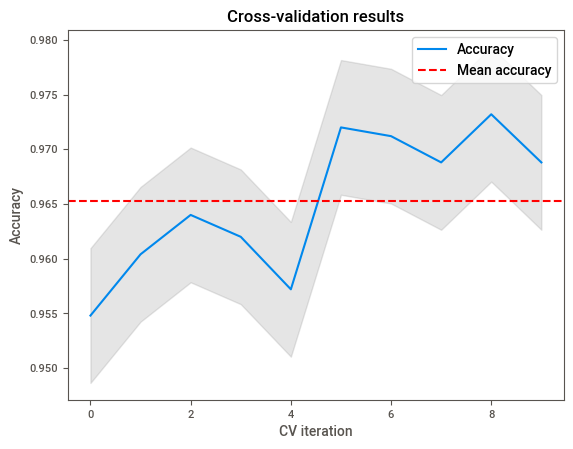

In [77]:
# plot the cross-validation results
plt.plot(scores, label='Accuracy')
plt.fill_between(range(len(scores)), scores-std_dev, scores+std_dev, color = 'gray', alpha = 0.2)
plt.axhline(y = mean_score, color = 'red', linestyle = '--', label = 'Mean accuracy')
plt.xlabel('CV iteration')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.legend()
plt.show()

In [78]:
# print the average accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.01)


# Logistic Regression

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is used for binary classification problems, where the goal is to predict one of two possible outcomes, such as "yes" or "no". Logistic Regression models the relationship between the dependent variable and independent variables by using the logistic function (also known as the sigmoid function).

The logistic function outputs a probability value between 0 and 1, which can then be thresholded to make binary class predictions. The coefficients of the independent variables in a Logistic Regression model can be estimated using maximum likelihood estimation. The model can then be used to make predictions for new data, by inputting the values of the independent variables and using the estimated coefficients to calculate the predicted probability.

In [79]:
# Create and fit a logistic regression model
# Create list of different solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [80]:
# loop through solvers and fit logistic regression model
for solver in solvers:
    logreg = LogisticRegression(solver=solver)
    logreg.fit(X_train, y_train)
    
# make predictions on train and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# calculate train and test accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [81]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      Faulty       0.69      0.75      0.72     12021
  Not Faulty       0.57      0.48      0.52      7979

    accuracy                           0.65     20000
   macro avg       0.63      0.62      0.62     20000
weighted avg       0.64      0.65      0.64     20000

              precision    recall  f1-score   support

      Faulty       0.68      0.76      0.72      2979
  Not Faulty       0.57      0.47      0.52      2021

    accuracy                           0.64      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.64      0.64      0.64      5000



In [82]:
print(f"Solver: {solver}")
print(f"Train_Accuracy: {train_acc:.3f}")
print(f"Test_Accuracy: {test_acc:.3f}")
print("")

Solver: saga
Train_Accuracy: 0.646
Test_Accuracy: 0.643



**Hyperparameter tuning using GridSearchCV**

In [83]:
# Define the set of solvers to be tested
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Define the parameter grid for GridSearchCV
param_grid = {'solver': solvers, 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
reg_gsc = grid_search.fit(X, y)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
reg_accuracy = reg_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(reg_accuracy) )

Best parameters:  {'C': 1000, 'solver': 'newton-cg'}
Best score:  0.7534
Accuracy for our training dataset with tuning is : 75.34%


# K Nearest Neighbors Classifier

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification as well as regression. It is a non-parametric, lazy learning algorithm that assigns the class label to a new sample point by considering the majority vote of its K nearest neighbors.

KNN is a distance-based algorithm that calculates the distance between the target sample and the neighboring samples. The number of nearest neighbors to be considered is represented by K. The algorithm assigns the class label to the target sample based on the majority vote of its K nearest neighbors. This algorithm is used in a wide range of applications, including computer vision, speech recognition, and even recommender systems.

In [84]:
# Create a Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [85]:
# Train the Knn Model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
# Evaluate the Model with Train Data
# Predict on Train Data
knn_pred_train = knn.predict(X_train)  
knn_pred_train

array(['Not Faulty', 'Not Faulty', 'Not Faulty', ..., 'Faulty', 'Faulty',
       'Faulty'], dtype=object)

In [87]:
# Confusion Matrix on Train Data
pd.crosstab(y_train, knn_pred_train, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions  Faulty  Not Faulty
Actual                         
Faulty        10249        1772
Not Faulty      801        7178

In [88]:
# Accuracy Measure on Train Data
print(skmet.accuracy_score(y_train, knn_pred_train)) 

0.87135


In [89]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, knn_pred_train))

              precision    recall  f1-score   support

      Faulty       0.93      0.85      0.89     12021
  Not Faulty       0.80      0.90      0.85      7979

    accuracy                           0.87     20000
   macro avg       0.86      0.88      0.87     20000
weighted avg       0.88      0.87      0.87     20000



In [90]:
# Predict on Test Data
knn_pred_test = knn.predict(X_test)
knn_pred_test

array(['Faulty', 'Faulty', 'Not Faulty', ..., 'Not Faulty', 'Faulty',
       'Faulty'], dtype=object)

In [91]:
# Confusion Matrix on Test Data
pd.crosstab(y_test, knn_pred_test, rownames = ['Actual'], colnames = ['Predictions'])

Predictions  Faulty  Not Faulty
Actual                         
Faulty         2345         634
Not Faulty      388        1633

In [92]:
# Accuracy Measure on Test Data
print(skmet.accuracy_score(y_test, knn_pred_test))  

0.7956


In [93]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

      Faulty       0.86      0.79      0.82      2979
  Not Faulty       0.72      0.81      0.76      2021

    accuracy                           0.80      5000
   macro avg       0.79      0.80      0.79      5000
weighted avg       0.80      0.80      0.80      5000



[Text(0.5, 1.0, 'Solar Panel Fault Detection - kNN- Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

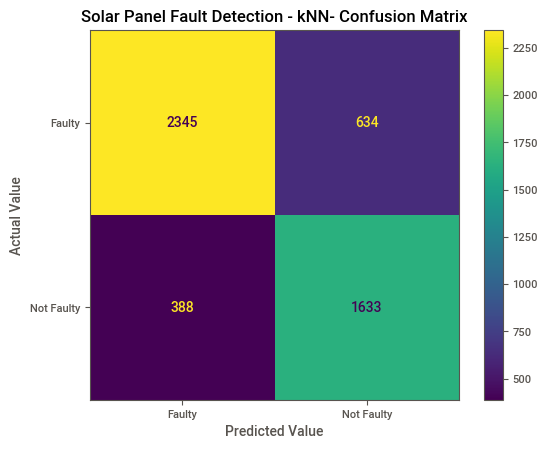

In [94]:
cm = skmet.confusion_matrix(y_test, knn_pred_test)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Faulty', 'Not Faulty'])
cmplot.plot()
cmplot.ax_.set(title = 'Solar Panel Fault Detection - kNN- Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [95]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    diff = train_acc - test_acc
    acc.append([diff, train_acc, test_acc])
acc

[[0.0998, 0.908, 0.8082],
 [0.07574999999999998, 0.87135, 0.7956],
 [0.061799999999999966, 0.8482, 0.7864],
 [0.048699999999999966, 0.8301, 0.7814],
 [0.04354999999999998, 0.81795, 0.7744],
 [0.042849999999999944, 0.80865, 0.7658],
 [0.04459999999999997, 0.8032, 0.7586],
 [0.03984999999999994, 0.79545, 0.7556],
 [0.036050000000000026, 0.78805, 0.752],
 [0.029549999999999965, 0.78175, 0.7522],
 [0.02839999999999998, 0.7752, 0.7468],
 [0.02694999999999992, 0.77255, 0.7456],
 [0.0262, 0.767, 0.7408],
 [0.0263000000000001, 0.7657, 0.7394],
 [0.02554999999999996, 0.76555, 0.74],
 [0.027100000000000013, 0.7633, 0.7362],
 [0.018550000000000066, 0.76075, 0.7422],
 [0.01824999999999999, 0.75885, 0.7406],
 [0.023950000000000027, 0.75715, 0.7332],
 [0.02265000000000006, 0.75665, 0.734],
 [0.02244999999999997, 0.75425, 0.7318],
 [0.020649999999999946, 0.75105, 0.7304],
 [0.02344999999999997, 0.74925, 0.7258],
 [0.022150000000000003, 0.74815, 0.726]]

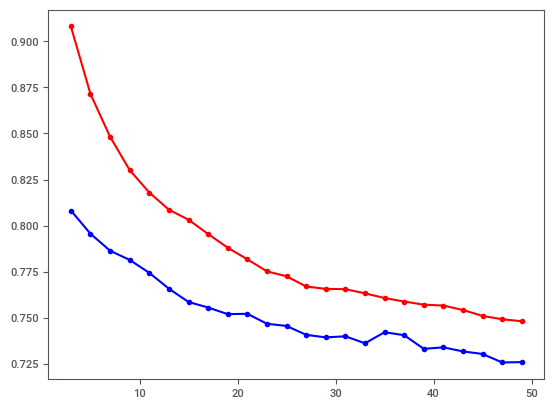

In [96]:
# Plotting the data accuracies in a single plot
# Train Data Accuracy Plot
plt.plot(np.arange(3, 50, 2), [i[1] for i in acc], "ro-")
# Test Data Accuracy Plot 
plt.plot(np.arange(3, 50, 2), [i[2] for i in acc], "bo-")

**Hyperparameter Tuning**

In [97]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
Knn = KNeighborsClassifier()

#Define Hyperparameters grid for grid search 
params_Knn = {'n_neighbors': np.arange(3, 50)}

# Initialize GridSearchCV
Knn_gs = GridSearchCV(knn, params_Knn, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1 )

# Fit GridSearchCV to the Data
Knn_new = Knn_gs.fit(X_train, y_train)

#Get the best Hyperparameters
print("Best Parameters:", Knn_new.best_params_)
print('Best score: ', Knn_new.best_score_)
Knn_accuracy = Knn_new.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Knn_accuracy) )

Fitting 5 folds for each of 47 candidates, totalling 235 fits
Best Parameters: {'n_neighbors': 3}
Best score:  0.7897000000000001
Accuracy for our training dataset with tuning is : 78.97%


# SVM

Support Vector Machines (SVM) is a popular machine learning algorithm used for classification and regression problems. It is a linear model that works well with high dimensional data, and is capable of solving complex problems with large amounts of data.

In SVM, the idea is to find the hyperplane that separates the classes with the maximum margin, which is defined as the distance between the hyperplane and the nearest samples from each class, called support vectors. The hyperplane that maximizes the margin is called the maximum margin hyperplane, and it provides the best separation between the classes.

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [99]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Build the SVM model
svm_model = SVC(kernel ='linear', C = 1)
svm_model.fit(X_train, y_train)
svm_model.fit(X_test, y_test)

SVC(C=1, kernel='linear')

In [101]:
# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)

# Make predictions on the train set
y_pred_train = svm_model.predict(X_train)

In [102]:
# Evaluation Metrics on test set
acc = accuracy_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", acc)

Accuracy: 0.7794


In [103]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      Faulty       0.87      0.74      0.80      2979
  Not Faulty       0.69      0.83      0.75      2021

    accuracy                           0.78      5000
   macro avg       0.78      0.79      0.78      5000
weighted avg       0.79      0.78      0.78      5000



In [104]:
# Evaluation Metrics on train set
acc = accuracy_score(y_train, y_pred_train)

# Print the evaluation metrics
print("Accuracy:", acc)

Accuracy: 0.7758


In [105]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      Faulty       0.87      0.74      0.80     12021
  Not Faulty       0.68      0.83      0.75      7979

    accuracy                           0.78     20000
   macro avg       0.77      0.79      0.77     20000
weighted avg       0.79      0.78      0.78     20000



# Save the Best Model with Pickel library 

Pickle is a Python library for serializing and deserializing Python objects to and from binary data streams. It is used to store and retrieve the state of Python objects, including custom classes and functions, between different runs of a program or between different Python processes.

In [106]:
# Save the model
pickle.dump(rfc, open('rfc.pkl', 'wb'))

In [107]:
import os
os.getcwd()

'C:\\Users\\hp\\Final Project'

In [108]:
# Load the model
model = pickle.load(open('rfc.pkl', 'rb'))